In [10]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [12]:
# 시작전 설정
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format='retina'  
#한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False)  # 축의 - 깨짐 방지

<b><font size="5" color="red">ch12_데이터시각화_seaborn</font></b>
# 2절. seaborn
- matplotlib 기반으로 다양한 색상, 테마, 차트 기능, groupby 기능 포함
    * 공식사이트 : https://seaborn.pydata.org
    * seaborn API : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
    1) 데이터 준비
    2) 미적 속성 설정 (한글설정을 다시)
    3) 함수를 이용하여 그래프 그리기 (수치형(관계형), 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4) 그래프 출력(show), 저장(savefig)

In [14]:
sns.__version__  # 버전 체크

'0.12.2'

## 2.1 데이터 준비하기
- iris, titanic

In [15]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris.isna().sum()  # 결측치 개수 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
iris.species.unique()  # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
iris['species'].value_counts()  # 범주별 데이터 개수
# iris.groupby('species')['sepal_length'].count()  - 결측치를 카운트 못하는 단점

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [43]:
titanic = sns.load_dataset('titanic')
titanic
# 타이타닉 생존자 예측 데이터 셋 주요 컬럼 설명
    # Survived : 생존 여부 (0 = 사망, 1 = 생존)
    # Pclass : 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
    # Sex : 성별
    # Age : 나이
    # SibSp : 함께 탑승한 자녀 / 배우자 의 수
    # Parch : 함께 탑승한 부모님 / 아이들 의 수
    # Ticket : 티켓 번호
    # Fare : 탑승 요금
    # Cabin : 수하물 번호
    # Boat : 탈출한 보트가 있다면 boat 번호
    # Embarked : 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)
    
titanic.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1432\600339126.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## 2.2 미적 속성 설정하기(style, context, palette, figsize, ...)
    - 한번 지정하면, 새롭게 지정하기 전까지 지속
### 1) 그래프 style 설정
 - https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51p)

AttributeError: 'Axes' object has no attribute 'move_legend'

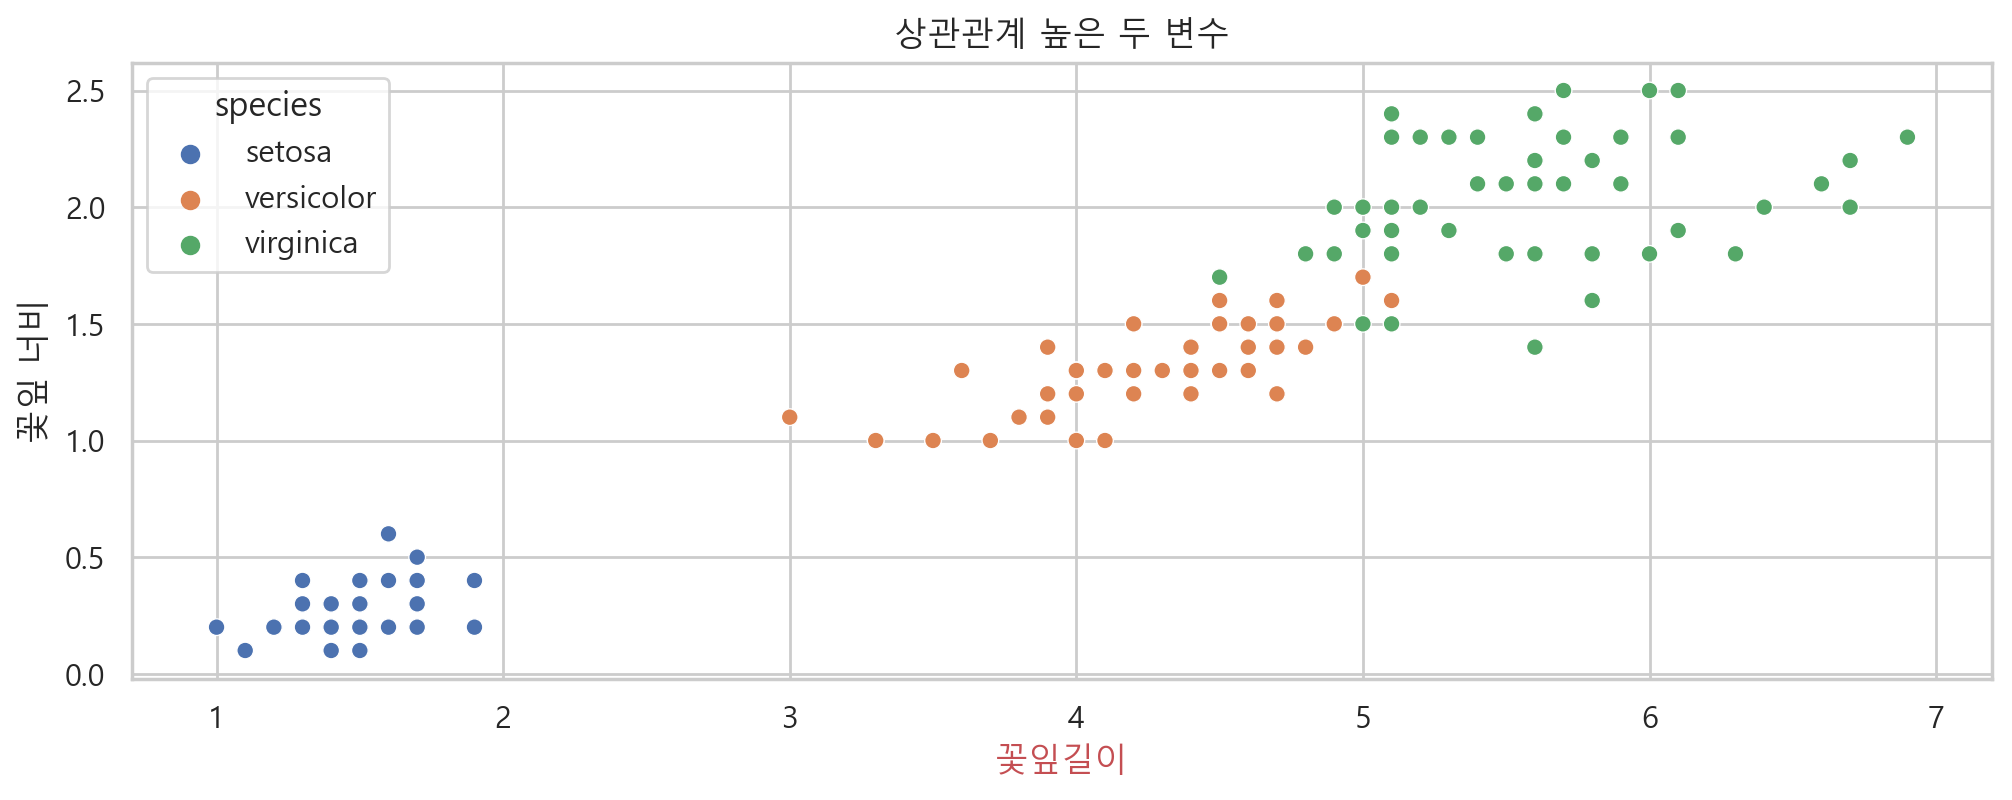

In [39]:
plt.figure(figsize=(12,4))
sns.set(style='whitegrid') # white, whitegrid, dark, darkgrid, ticks
# 셋을 하면 기존의 설정이 초기화 되므로, 유지를 원하는 설정은 다시 처리해줘야한다
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)  

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title='상관관계 높은 두 변수',
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎길이', color='r')
ax.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### 2) 컨텐스트 지정(비율)

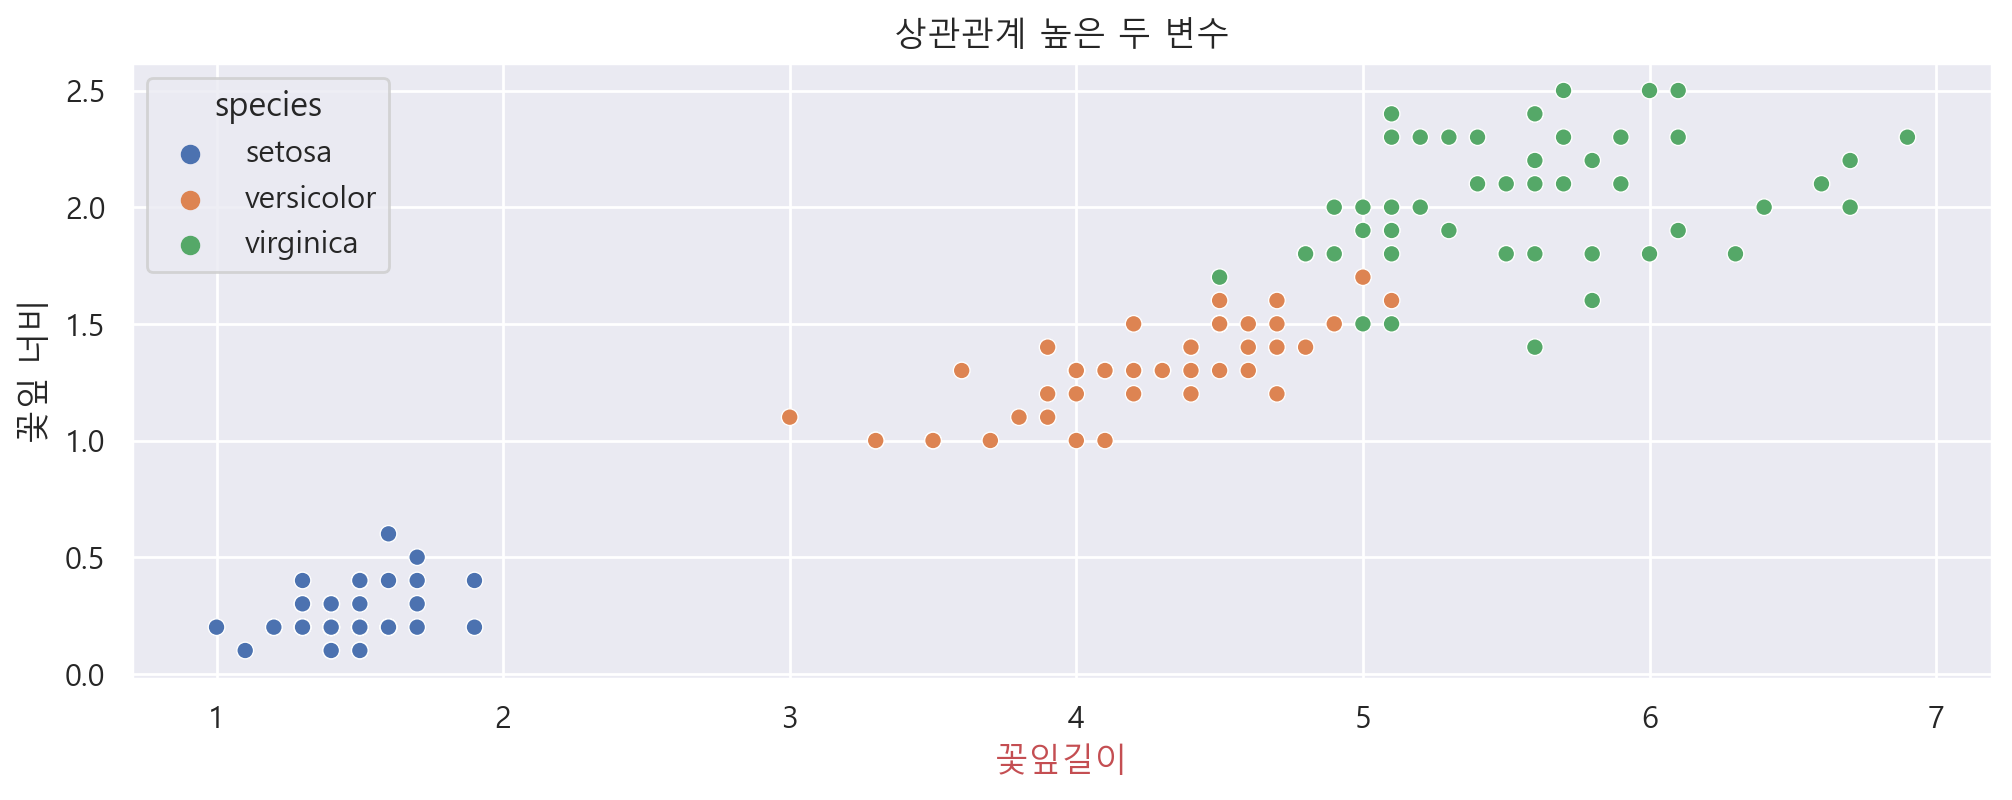

In [41]:
plt.figure(figsize=(12,4))
sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)  

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title='상관관계 높은 두 변수',
      ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎길이', color='r')

plt.show()

### 3) 색상지정
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

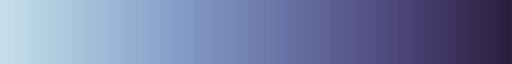

In [56]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

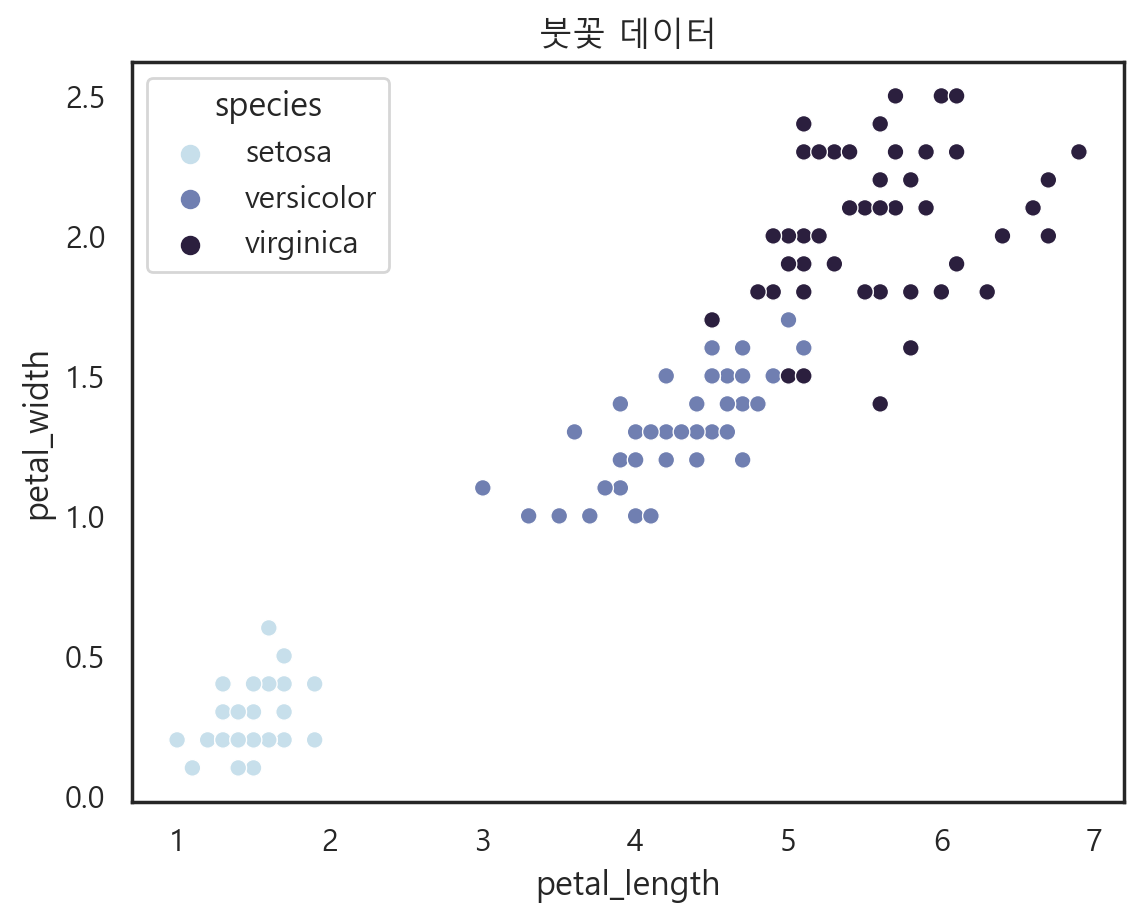

In [52]:
sns.set(palette="ch:s=.25,rot=-.25", style='white', context='notebook')
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False)  # 축의 - 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette="ch:s=.25,rot=-.25")
ax.set_title('붓꽃 데이터')
plt.show()

In [57]:
sns.set(palette="Set1", 
        style='whitegrid', 
        context='notebook',
       rc={'figure.figsize' : (10,3)}) # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False)  # 축의 - 깨짐 방지

## 2.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
- x 축이 수치형 데이터
    * ex) scatterplot, lineplot  => relplot(서브플롯)

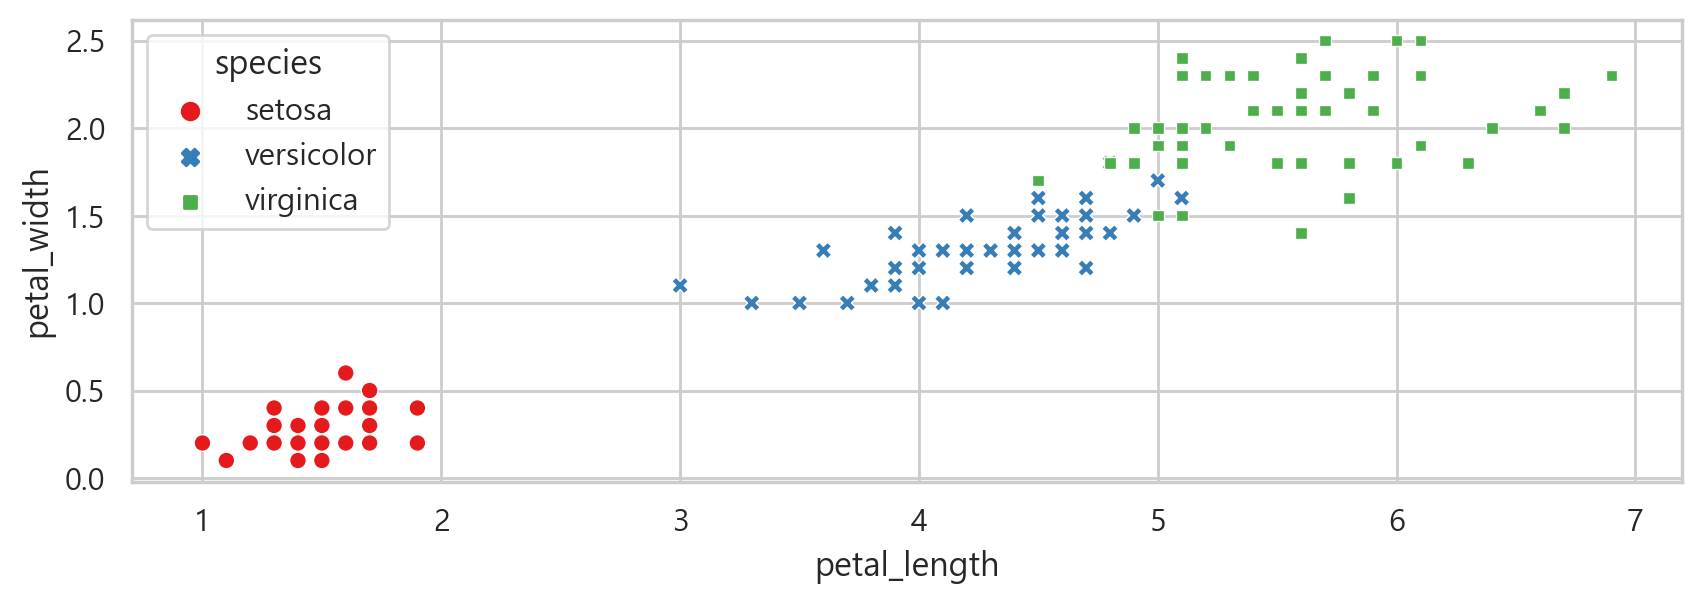

In [61]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species'  # species별 색상과 스타일(마커)이 다른 점그래프
               )
plt.show()

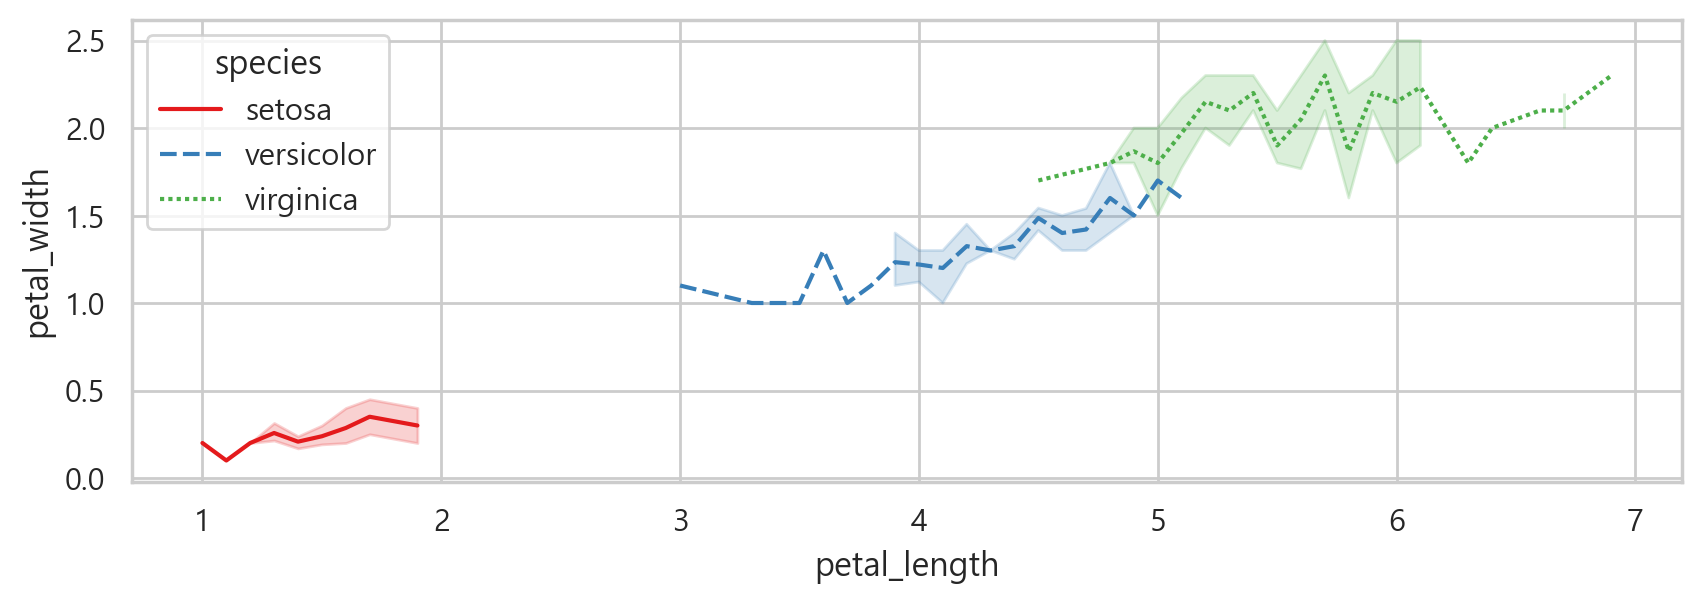

In [63]:
# lineplot의 음영은 95% 신뢰구간을 의미한다
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', 
               palette='Set1', style='species'  # 종별로 라인의 스타일(선의 모양)이 달라짐
               )
plt.show()

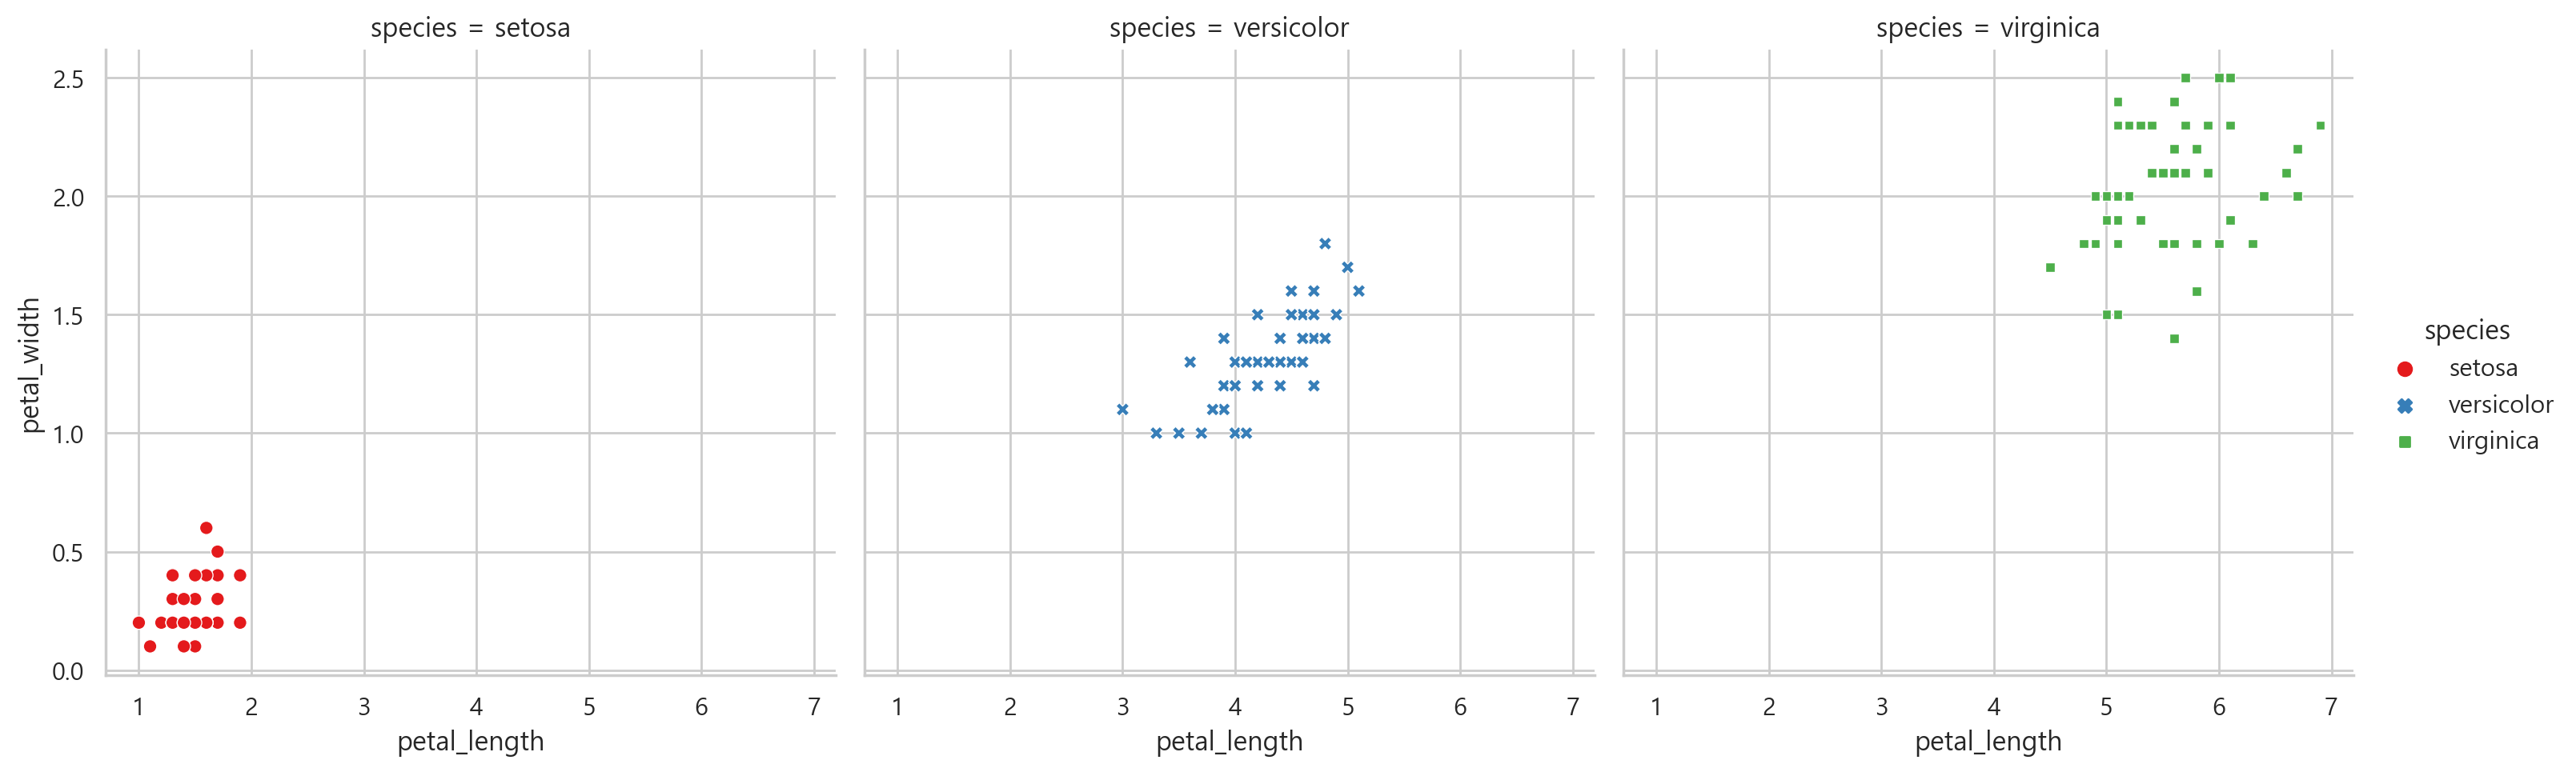

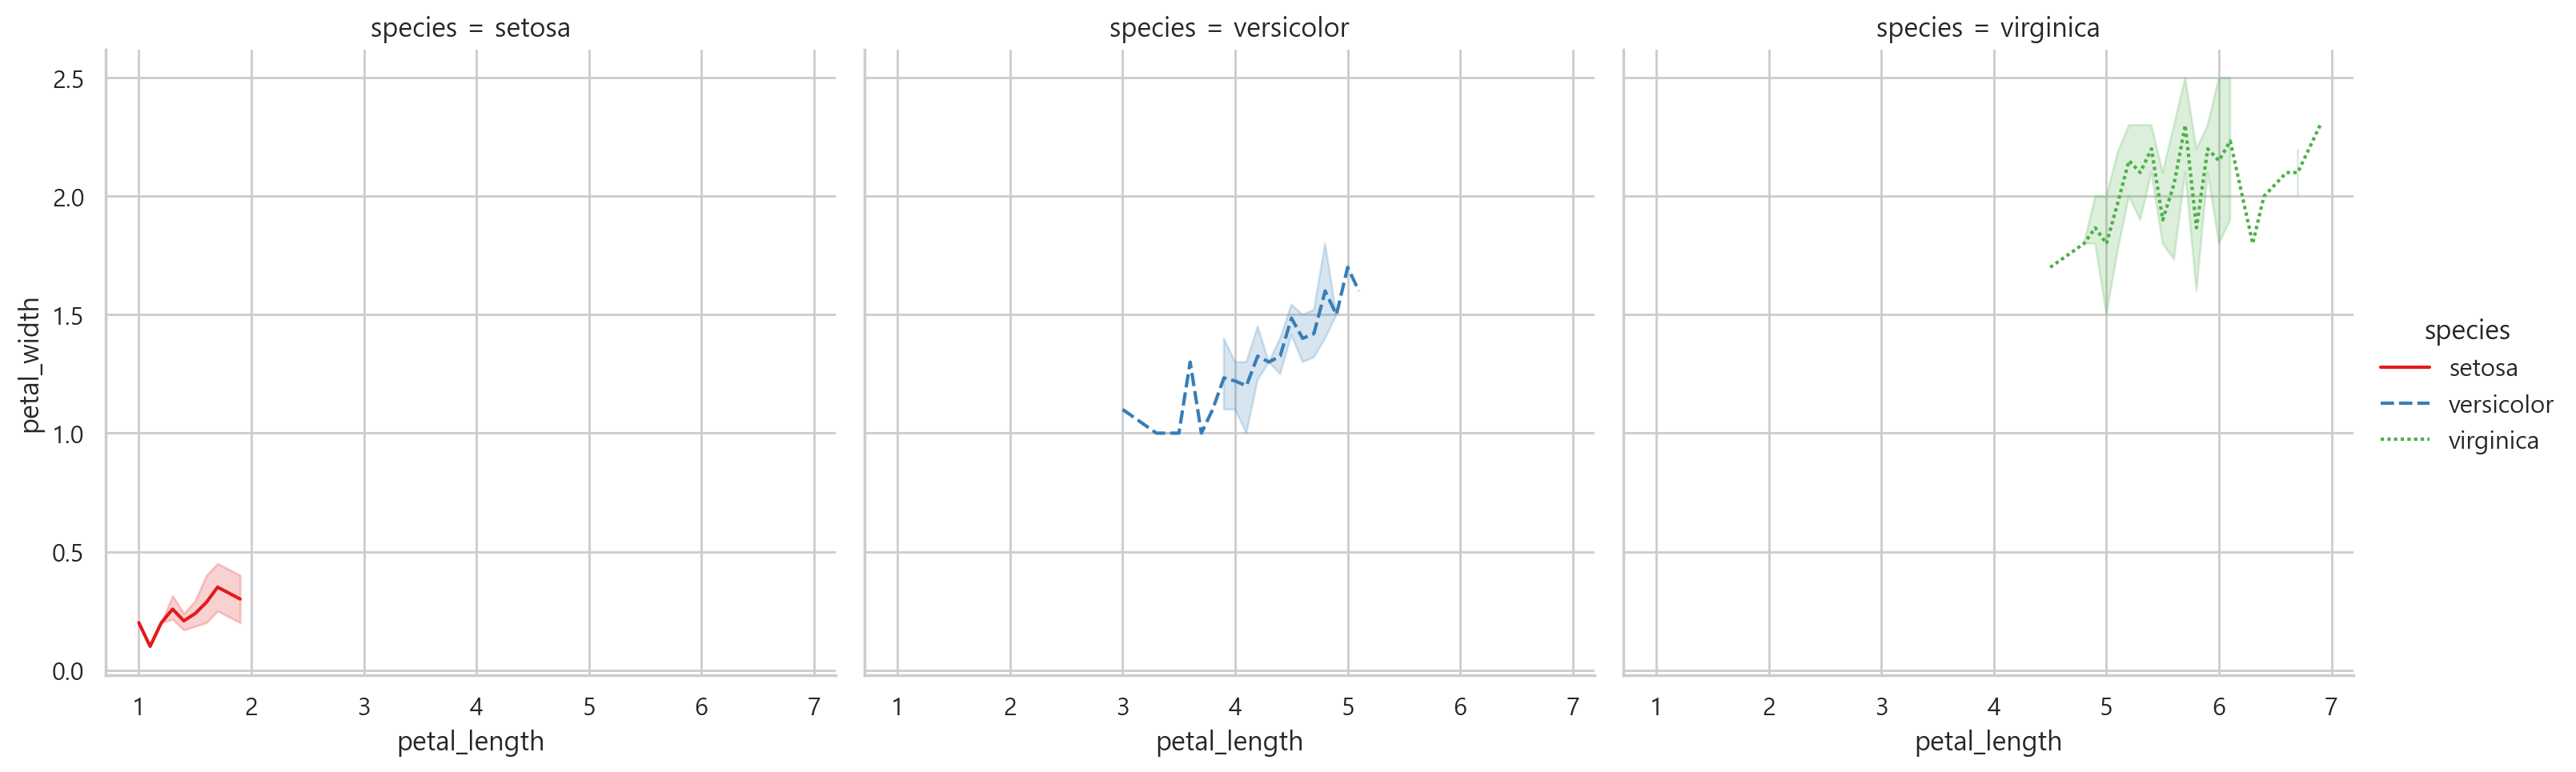

In [74]:
# 종별 lineplot를 서브플롯으로 분리해서 그리기
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           palette='Set1', style='species',
#           kind = 'line', # kind 기본값은 scatter
           col = 'species',  # col=분리할 기준항목, species 별 서브플롯
#           col_wrap=2,  # 한줄에 표현될 서브플롯수
           )

# 라인 플롯으로 변경
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           palette='Set1', style='species',
           kind = 'line', # kind 기본값은 scatter
           col = 'species',  # col=분리할 기준항목, species 별 서브플롯
#           col_wrap=2,  # 한줄에 표현될 서브플롯수
           )
plt.show()

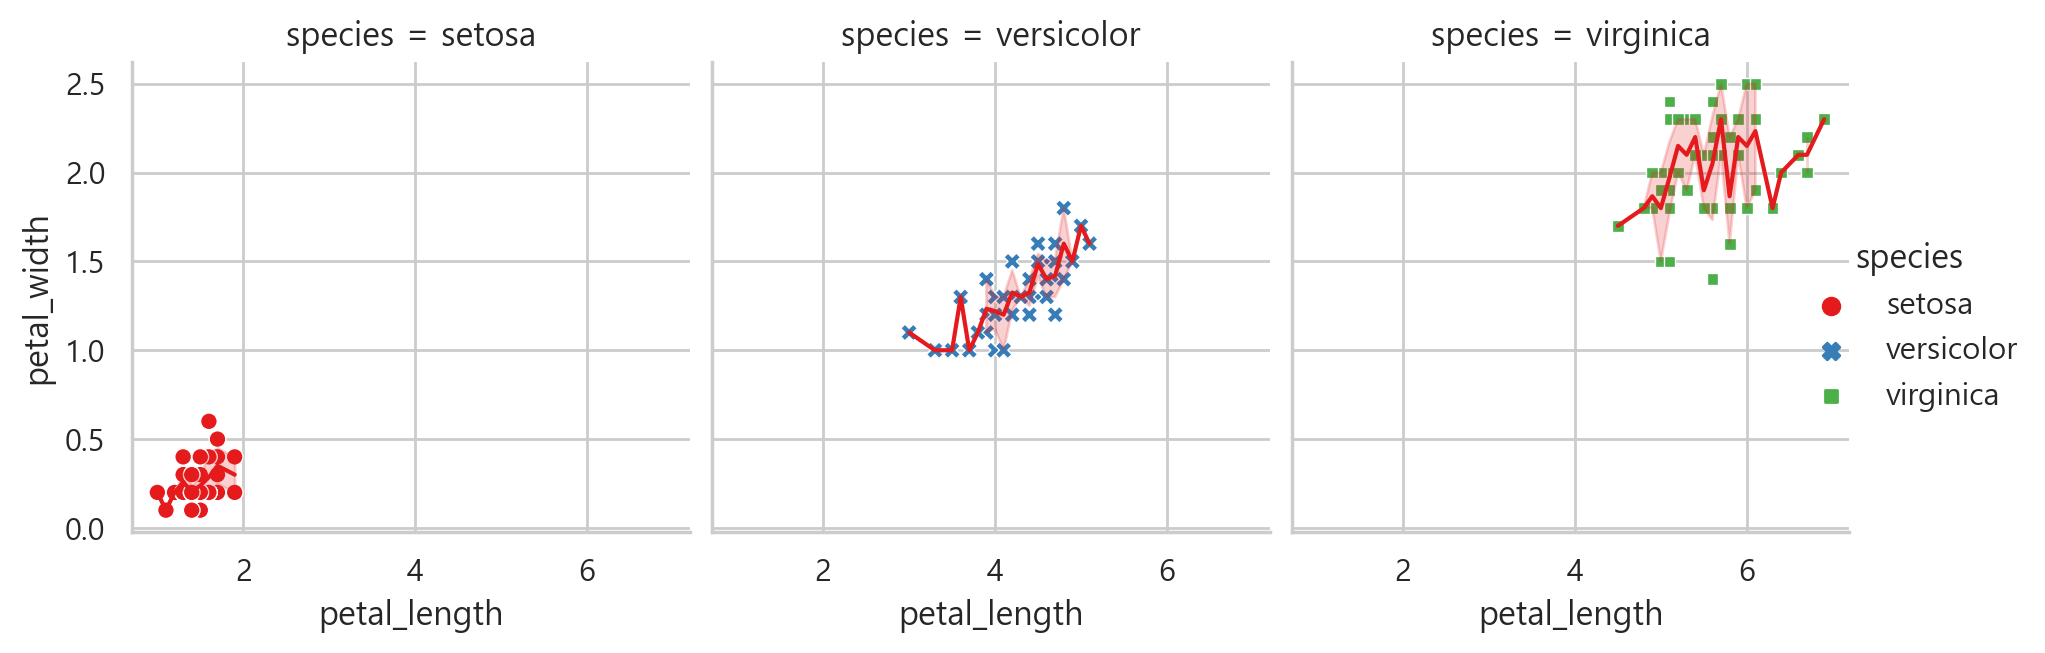

In [77]:
# 종별 lineplot과 scatterplot를 서브플롯을 겹쳐서 출력
g = sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
           palette='Set1', style='species',
           kind = 'scatter', 
           col = 'species',      
           )
# g 그래프에 line 플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width', hue='species')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 기존에 설정한 figsize 무시
g.fig.set_size_inches(10,3)

plt.show()

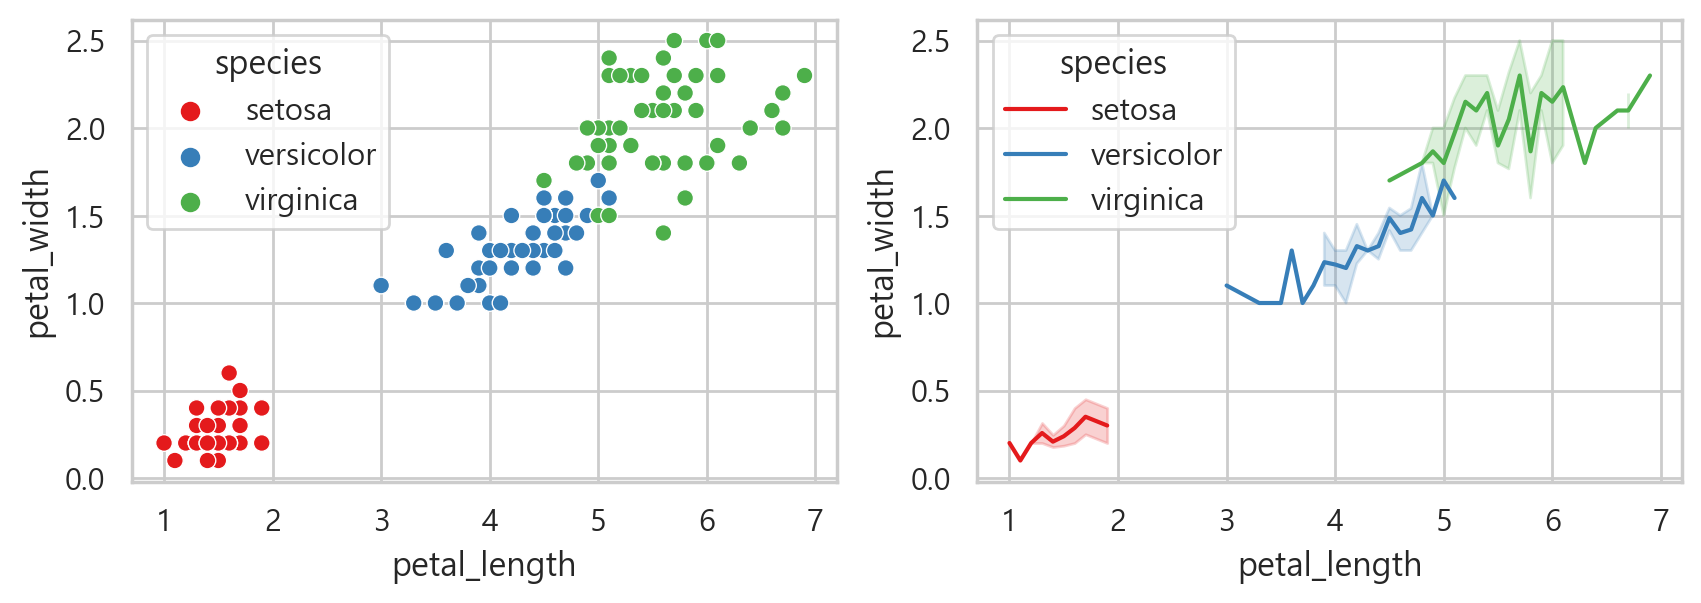

In [79]:
# ax[0]에는 scatter, ax[1] lineplot 은 seaborn에선 지원하지 않는다
# plt.subplots로 함수 객체 생성, sns로 함수를 그리며 ax 매개변수에 할당된 그래프 자리를 입력
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', 
                ax=ax[0]  # ax 0방에 해당 그래프를 배치
               )
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', 
                ax=ax[1]  # ax 1방에 해당 그래프를 배치
               )
plt.show()

### 2) 범주형 그래프
- x 축이 범주형 데이터
    * ex) stripplot(무작위흩뿌림), swarmplot(겹치지 않는 산점도)
          barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
          countplot(x의 빈도수가 높이)
          boxplot, violinplot, boxenplot
          => catplot (서브플롯)

<Axes: xlabel='species', ylabel='petal_width'>

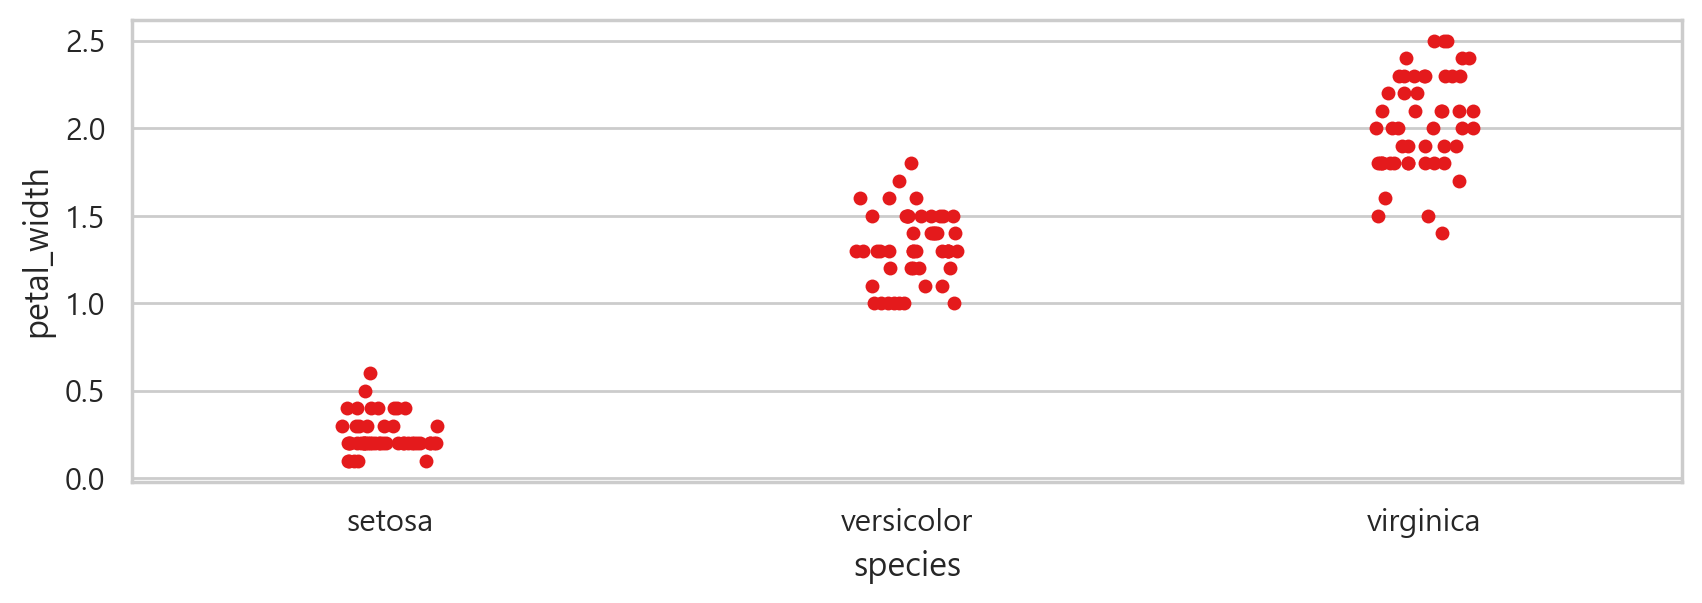

In [82]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width')
# stripplot : 무작위로 흩뿌린 산점도. 분포의 범위는 알수 있으나 분포의 정도나 밀도는 정확히 알기는 어렵다

<Axes: xlabel='species', ylabel='petal_width'>

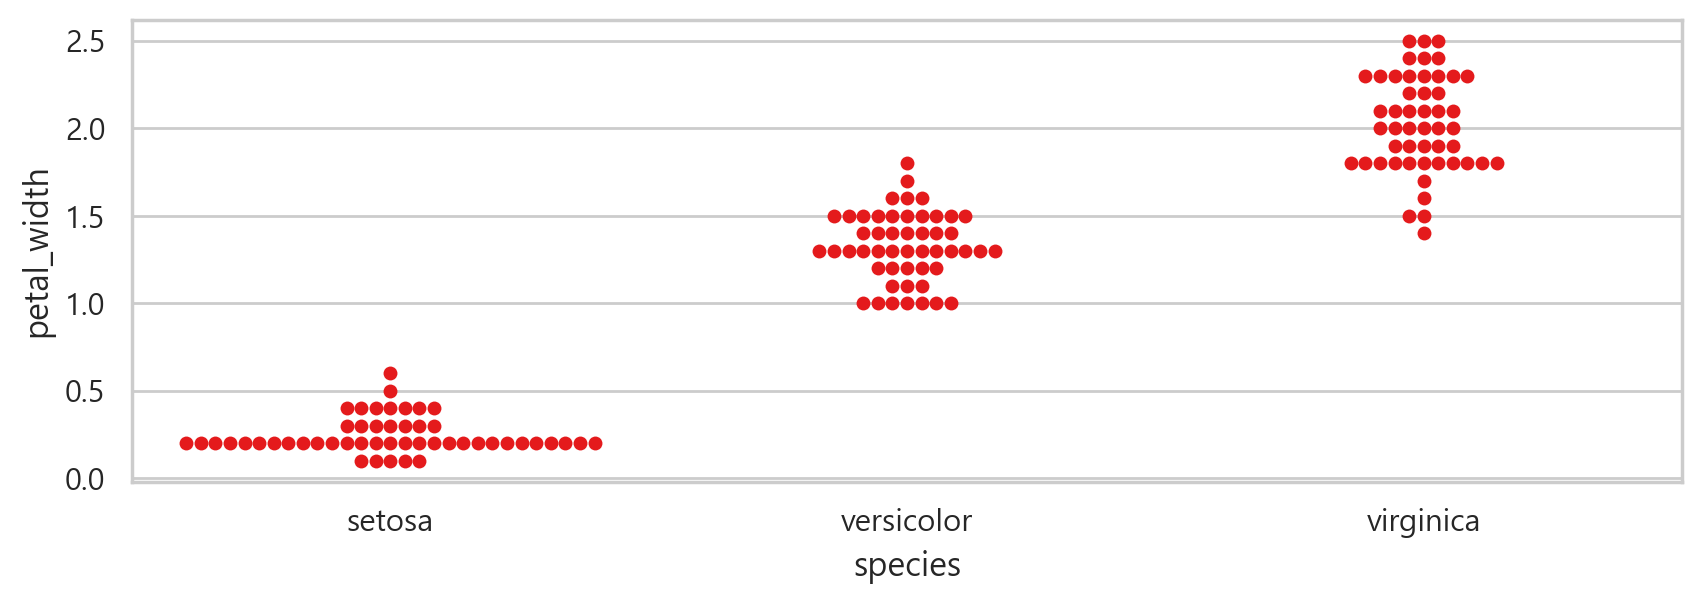

In [88]:
# swarmplot : 정렬된 산점도. 분포의 범위와 분포를 알수있다. 
# 데이터양이 많아지면 성능 이슈가 있을 수 있다. 그 경우 분포를 보는 것이므로 샘플을 추출하여 처리한다
sns.swarmplot(data=iris, x='species', y='petal_width')

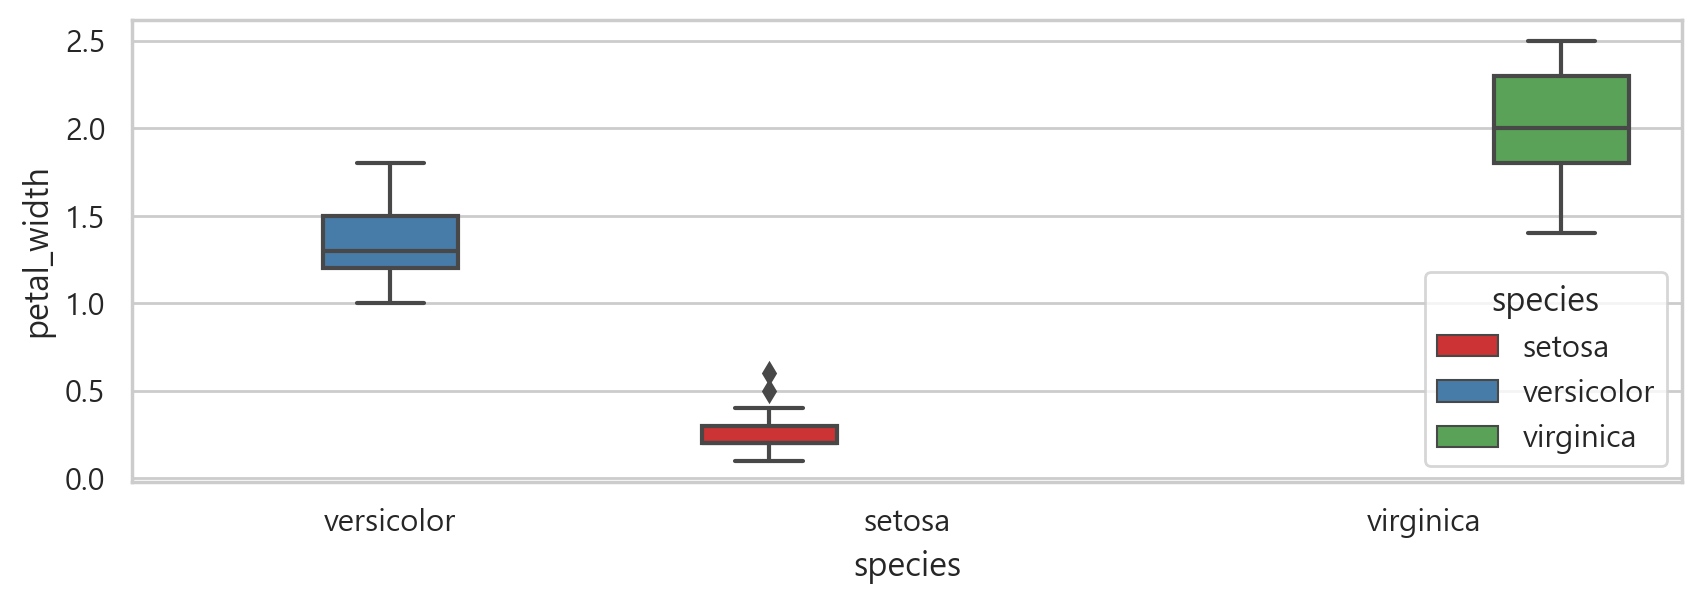

In [93]:
# 범주형 그래프의 x축을 지정하지 않으면, 알아서 x축이 될만할 것을 찾아 그려준다
sns.boxplot(data=iris, 
           x='species',
           y='petal_width',
           hue='species',
           order=['versicolor', 'setosa', 'virginica'])
plt.show()

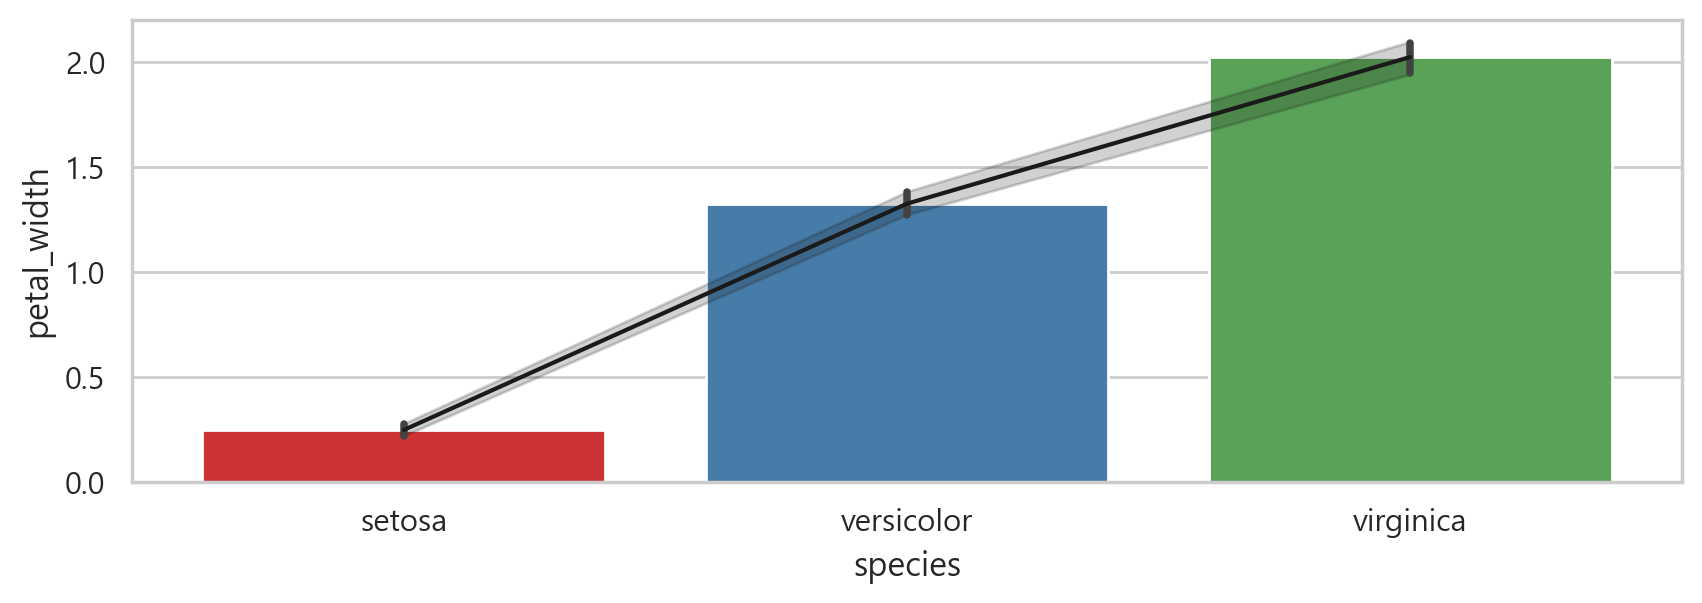

In [104]:
# barplot, barhplot, pointplot : 범주별 평균값(y)과 그에 대한 신뢰구간
            # errorbar=None 신뢰구간 표시 제거
sns.barplot(data=iris, x='species', y='petal_width',
#            errorbar=None
           )  
sns.lineplot(data=iris, x='species', y='petal_width', color='k')

plt.show()

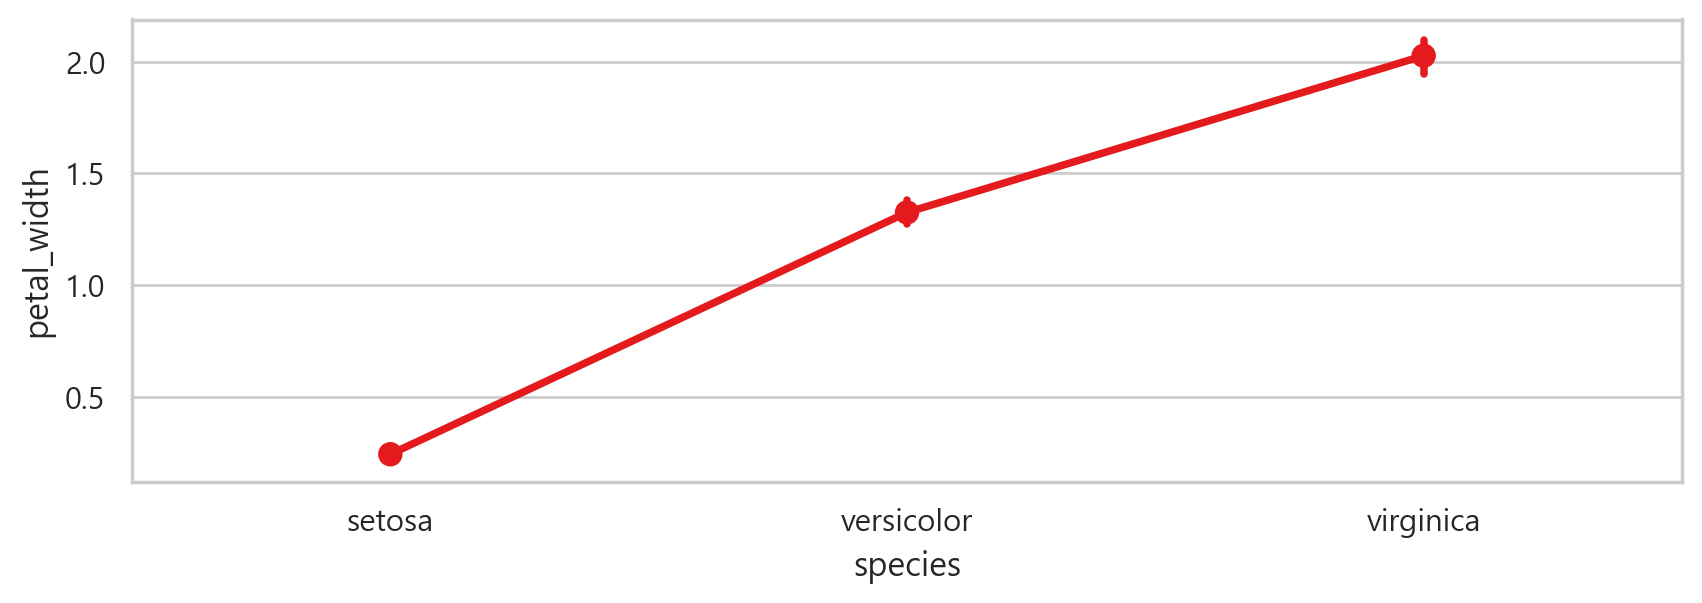

In [105]:
sns.pointplot(data=iris, x='species', y='petal_width') # 신뢰구간을 제외
plt.show()

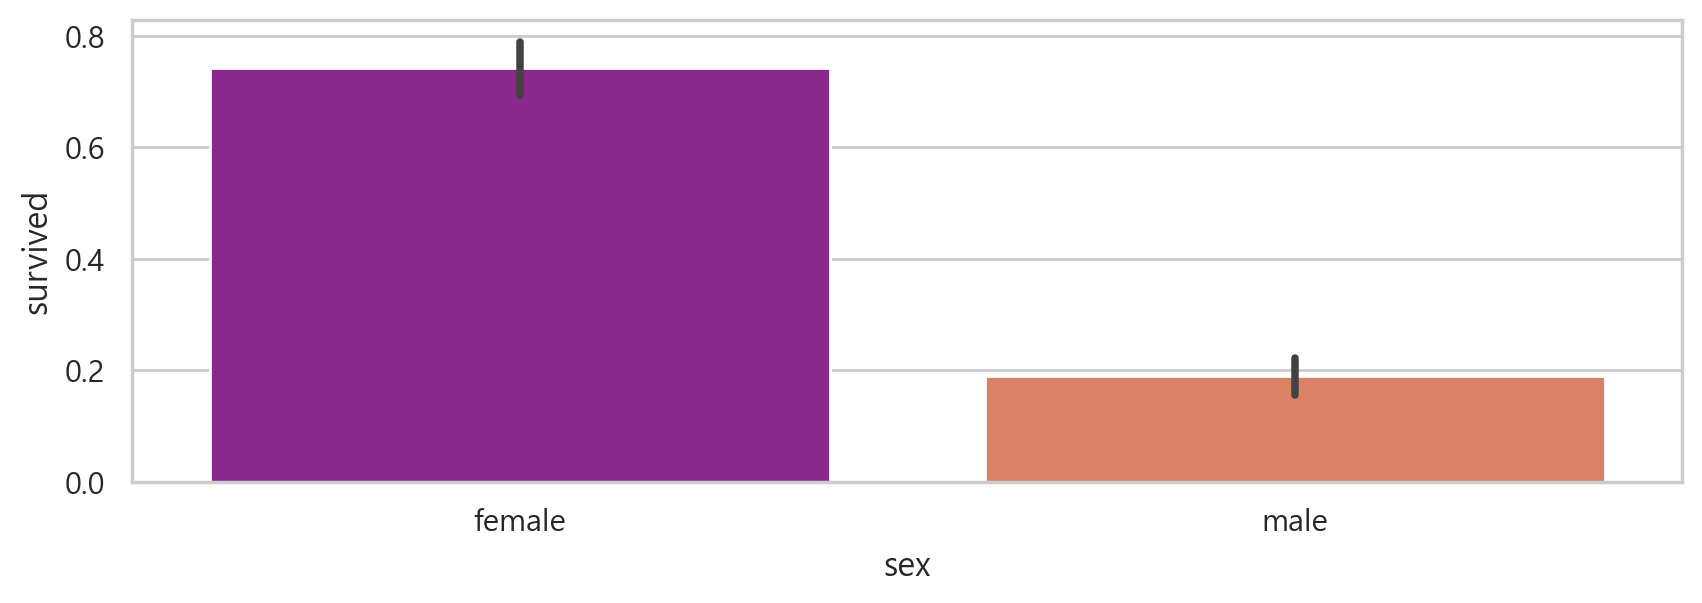

In [113]:
# 성별 생존율을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female', 'male'],
           palette='plasma')
plt.show()

In [132]:
print( '남자 탑승객 수 :', len(titanic[titanic.sex=='male']) )
print( '여자 탑승객 수 :',  len(titanic[titanic.sex=='female']) )
print( '남자 생존자 수 :',  len(titanic[(titanic.sex=='male')&(titanic.survived==1)]) )
print( '남자 사망자 수 :', len(titanic[(titanic.sex=='male')&(titanic.survived==0)]) )
print( '여자 사망자 수 :', len(titanic[(titanic.sex=='female')&(titanic.survived==1)]) )
print( '여자 사망자 수 :', len(titanic[(titanic.sex=='female')&(titanic.survived==0)]) )

남자 탑승객 수 : 577
여자 탑승객 수 : 314
남자 생존자 수 : 109
남자 사망자 수 : 468
여자 사망자 수 : 233
여자 사망자 수 : 81


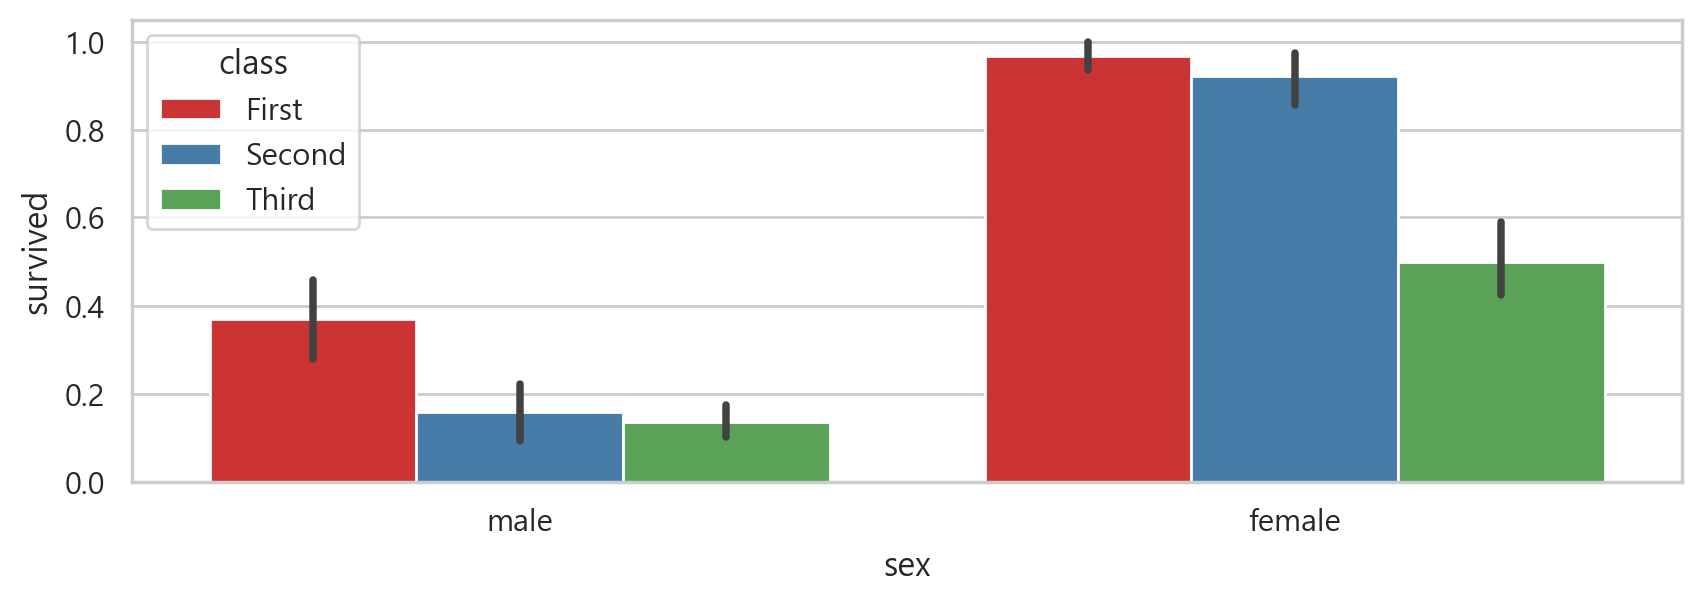

In [134]:
# 성별 생존율 hue = 'class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

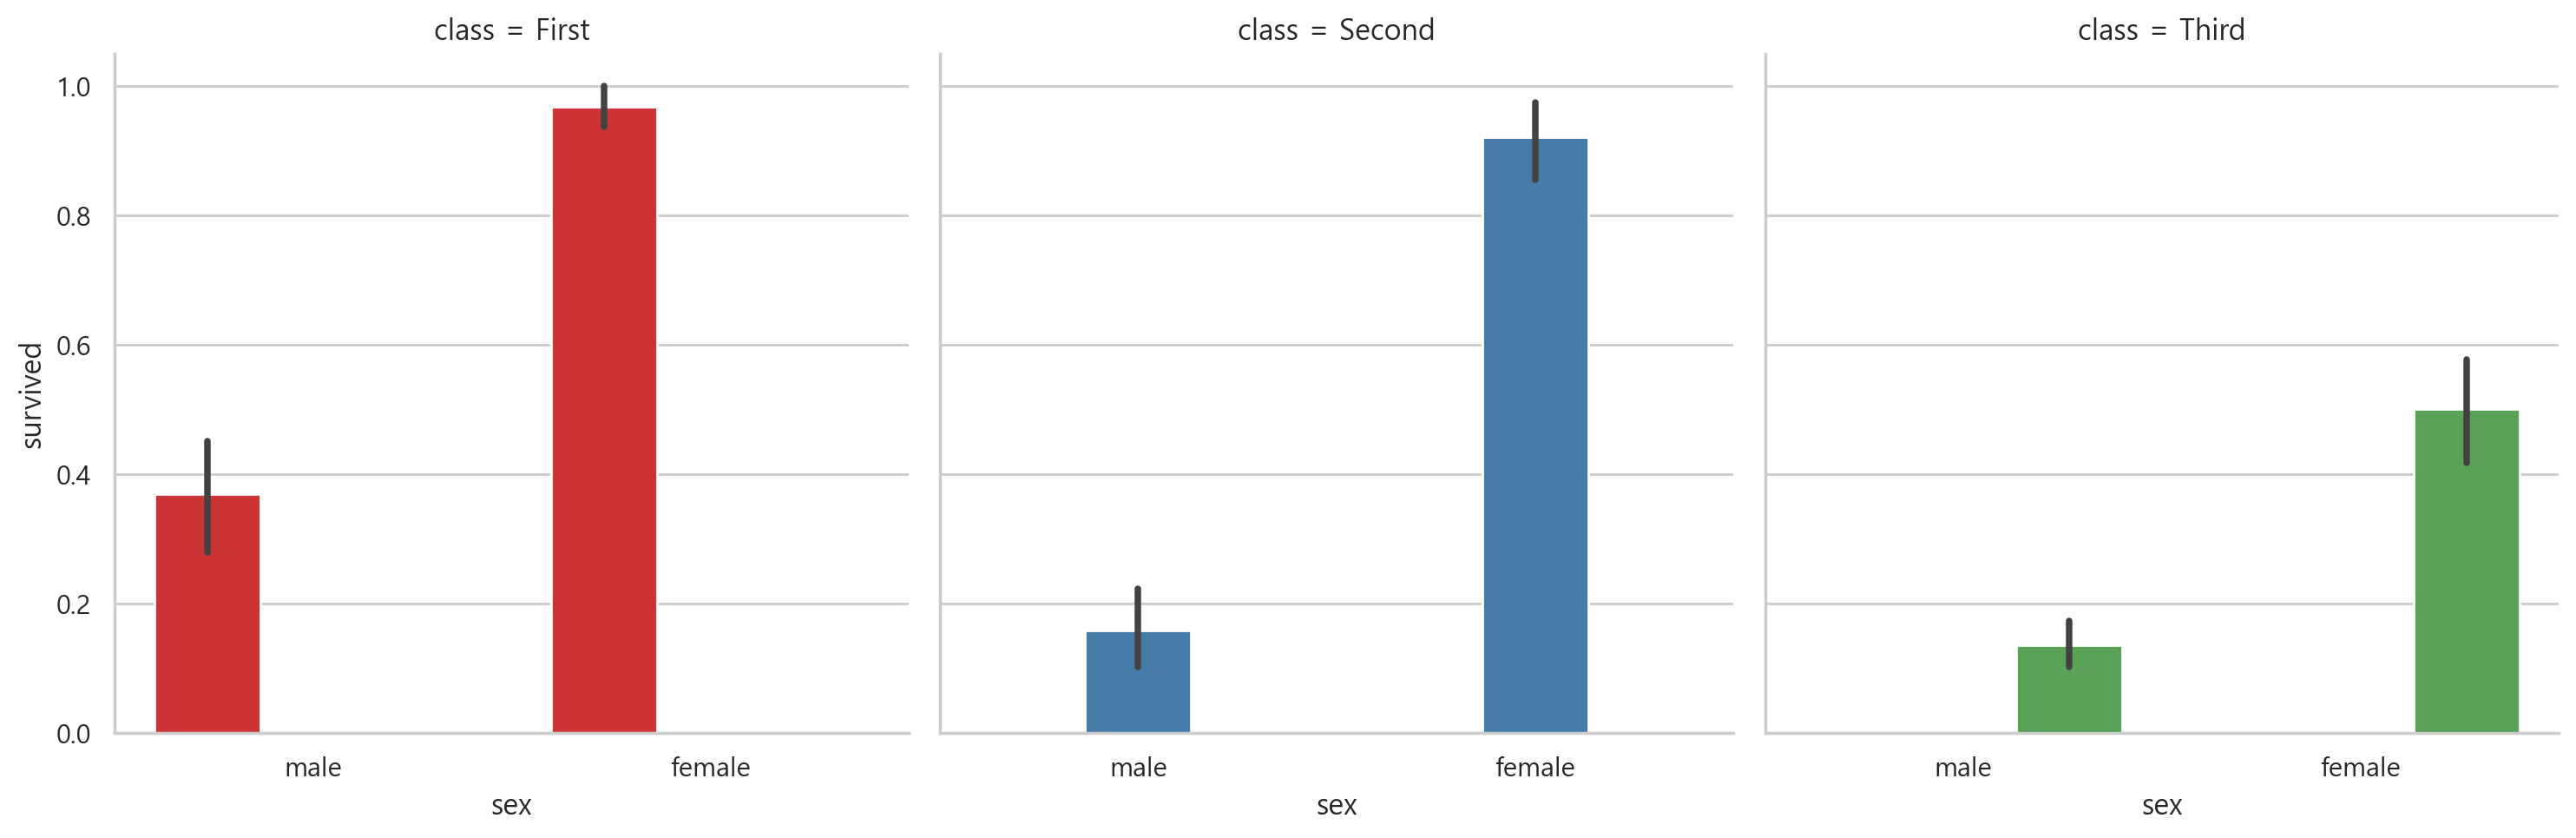

In [141]:
# class 별로 성별 생존률을 서브플롯(막대그래프)
sns.catplot(data=titanic, x='sex', y='survived', hue='class',
            kind='bar', 
            col='class',  # col=분리할기준
#           col_warp=2    # 한행에 그려질 서브플롯갯수, 기본값은 col의 개수 n
           ) 

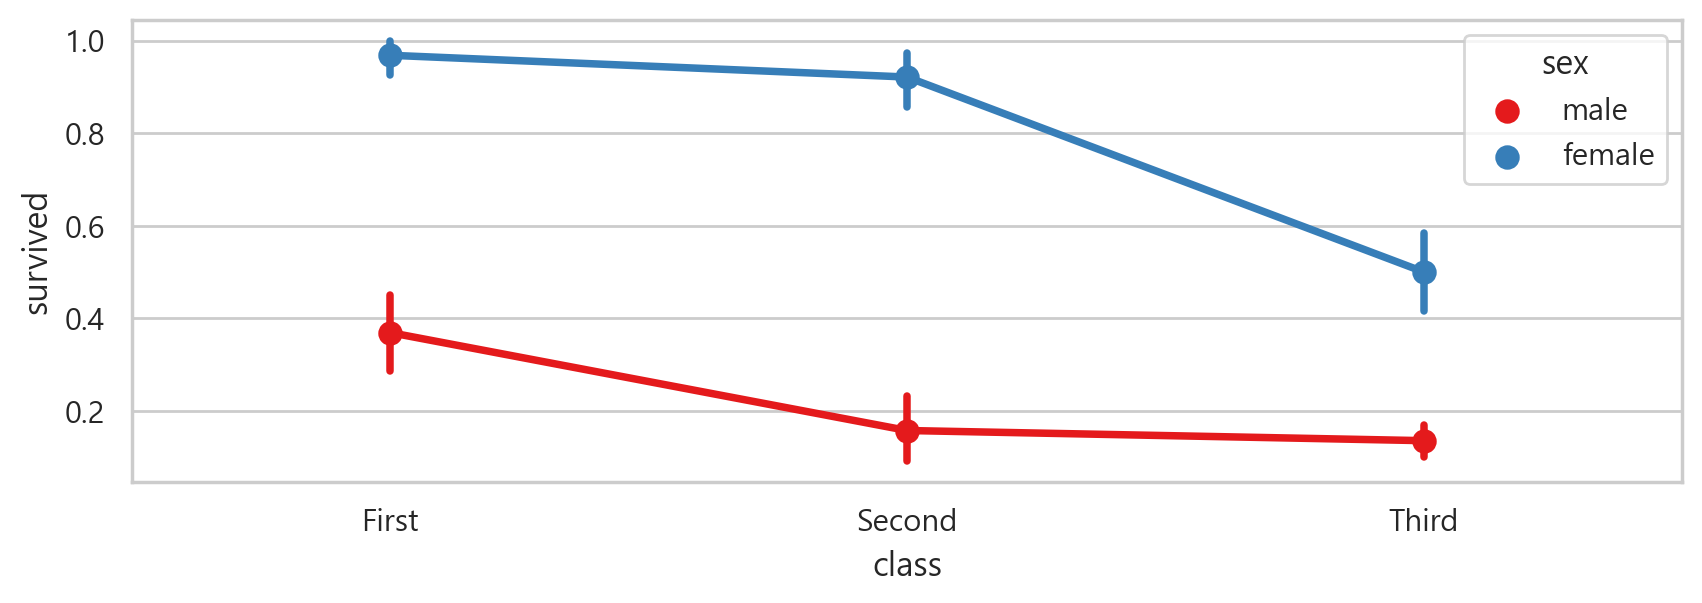

In [143]:
# 성별 생존율 hue = 'class'
sns.pointplot(data=titanic, x='class', 
              y='survived', 
              hue='sex')
plt.show()

In [149]:
print('deck 전체 데이터 객수 : {}, 결측치 갯수 : {}'.format(len(titanic),
                                               titanic.deck.isna().sum()
                                               ) 
     )

deck 전체 데이터 객수 : 891, 결측치 갯수 : 688


In [167]:
deckcnt = titanic.deck.value_counts()
deckcnt

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

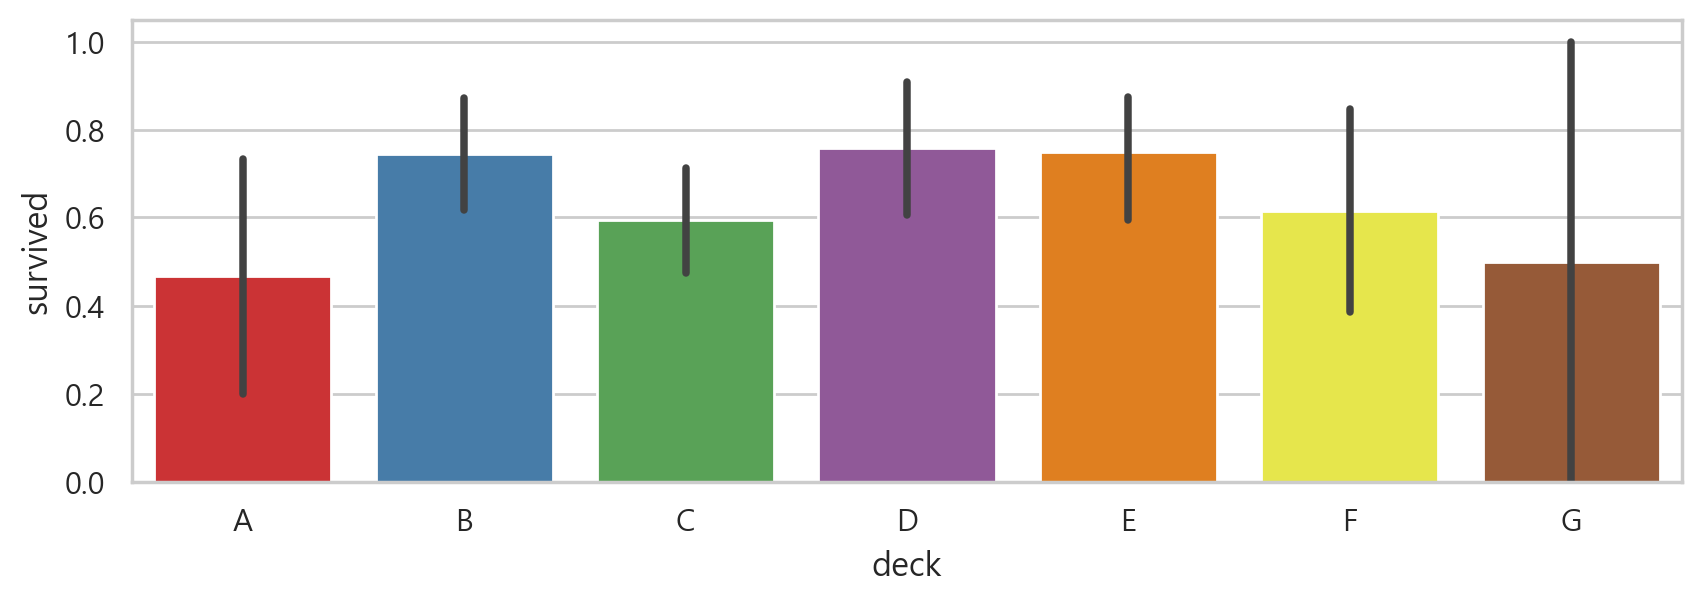

In [172]:
# 성별 생존율 hue = 'class'
sns.barplot(data=titanic, x='deck', 
              y='survived', 
#              hue='sex'
           )
plt.show()

<Axes: xlabel='sex', ylabel='age'>

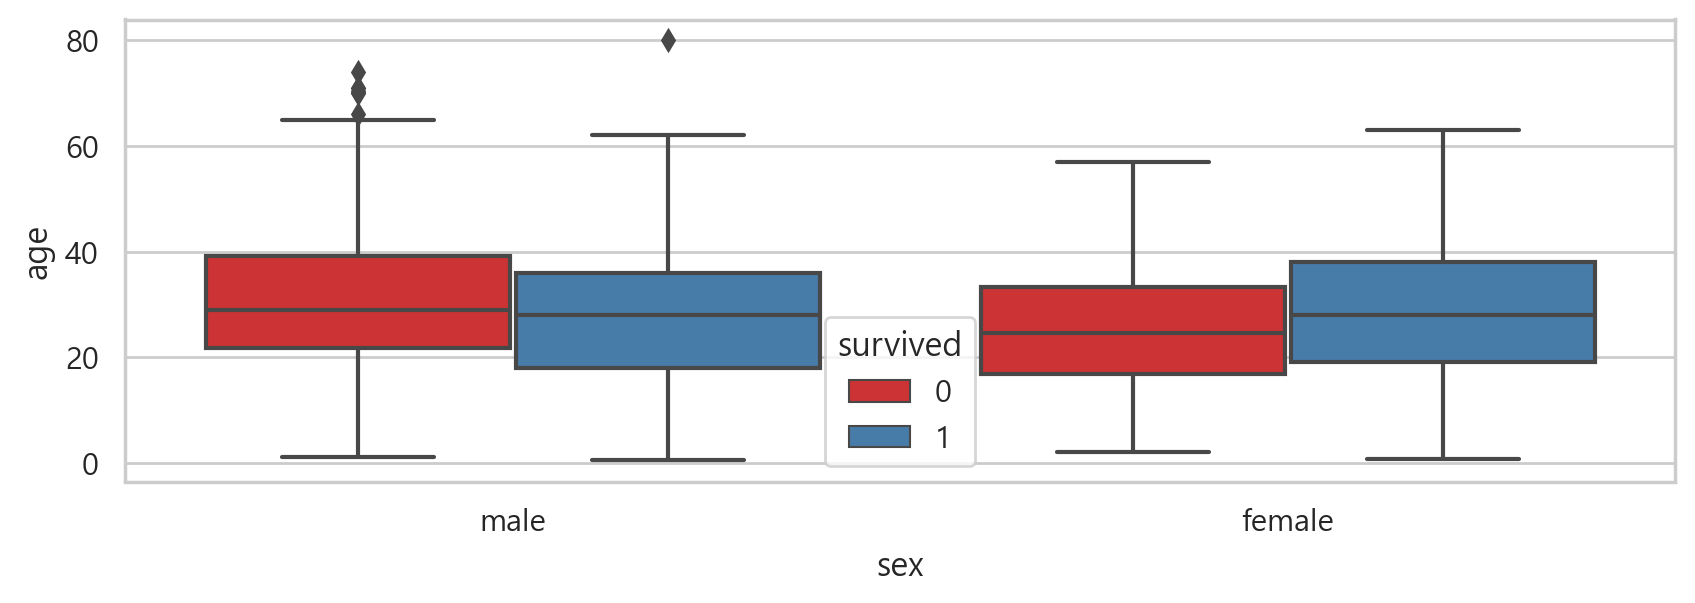

In [175]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

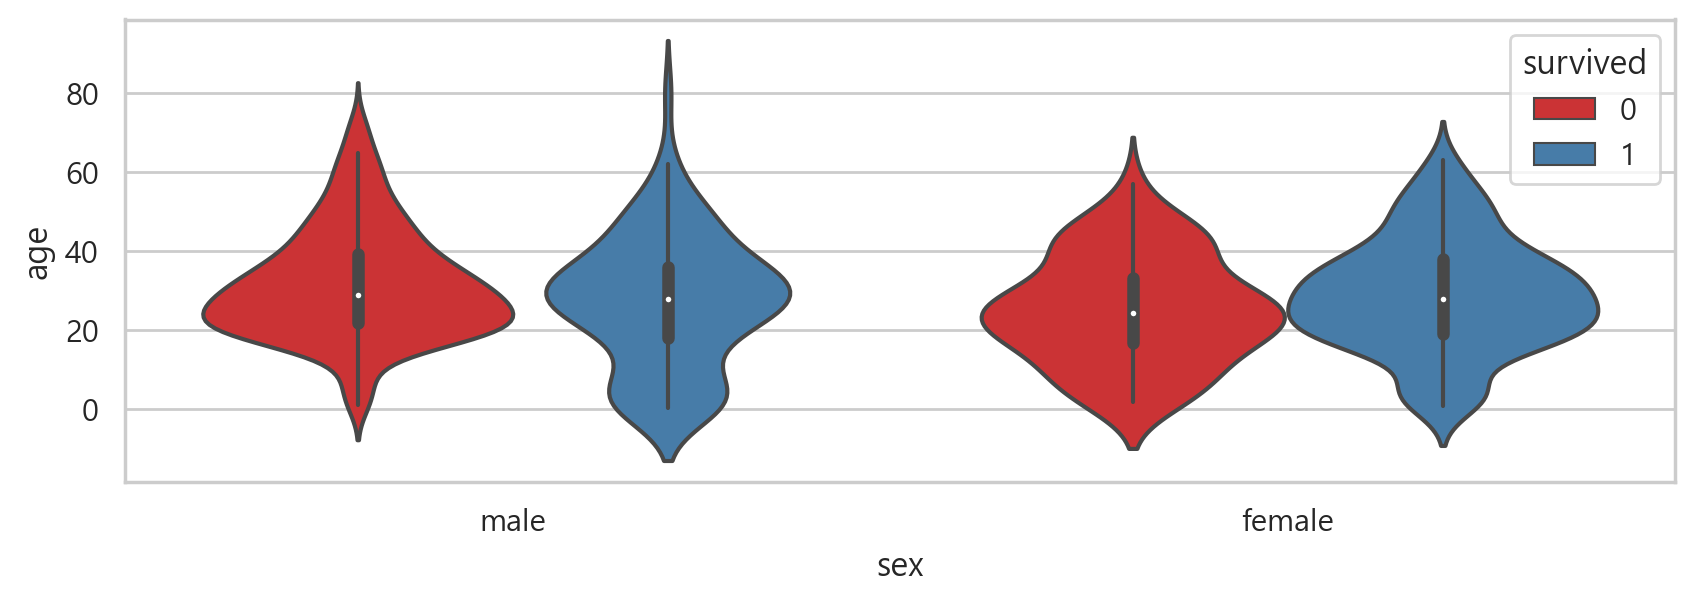

In [174]:
# violinplot
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

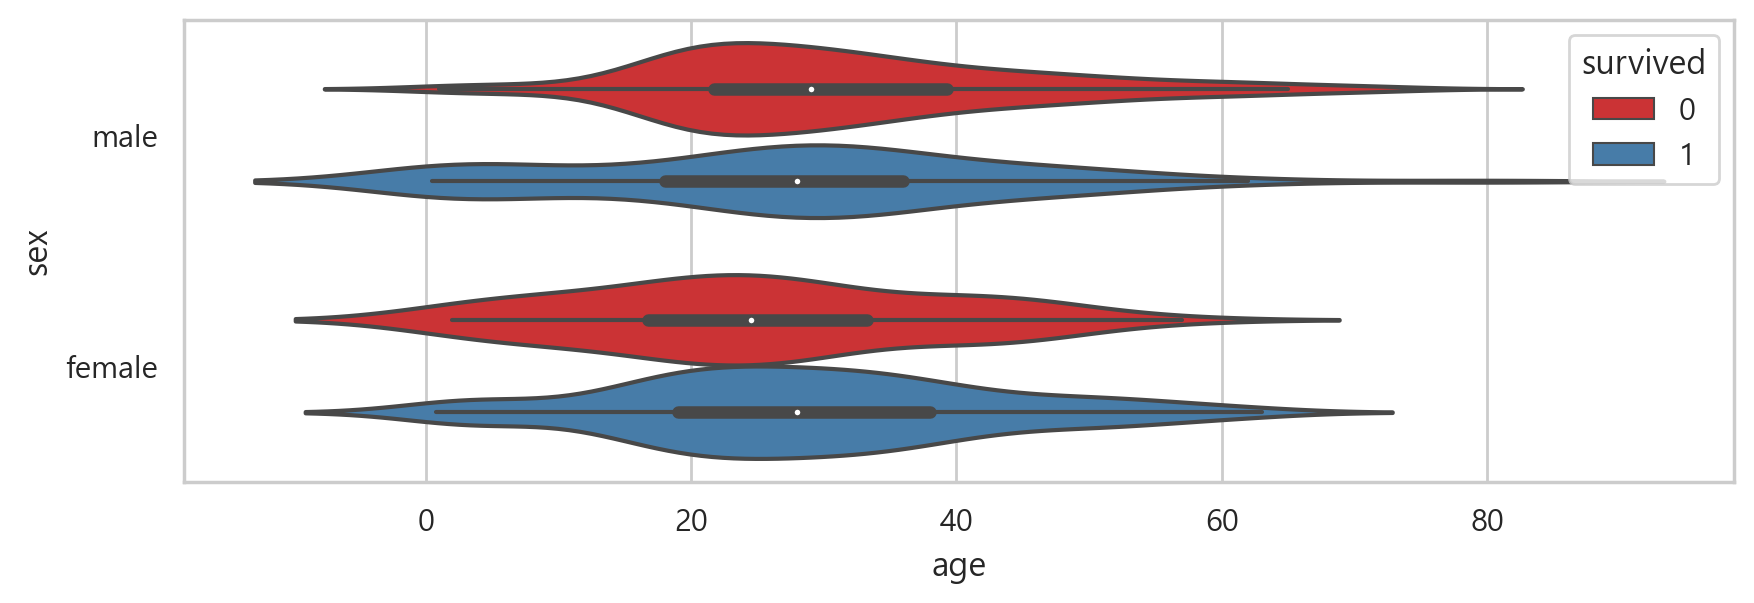

In [176]:
# boxplot, violinplot - 가로변환, 축에 들어갈 열을 바꿔주면 된다
sns.violinplot(data=titanic, x='age', y='sex', hue='survived' )

<Axes: xlabel='sex', ylabel='age'>

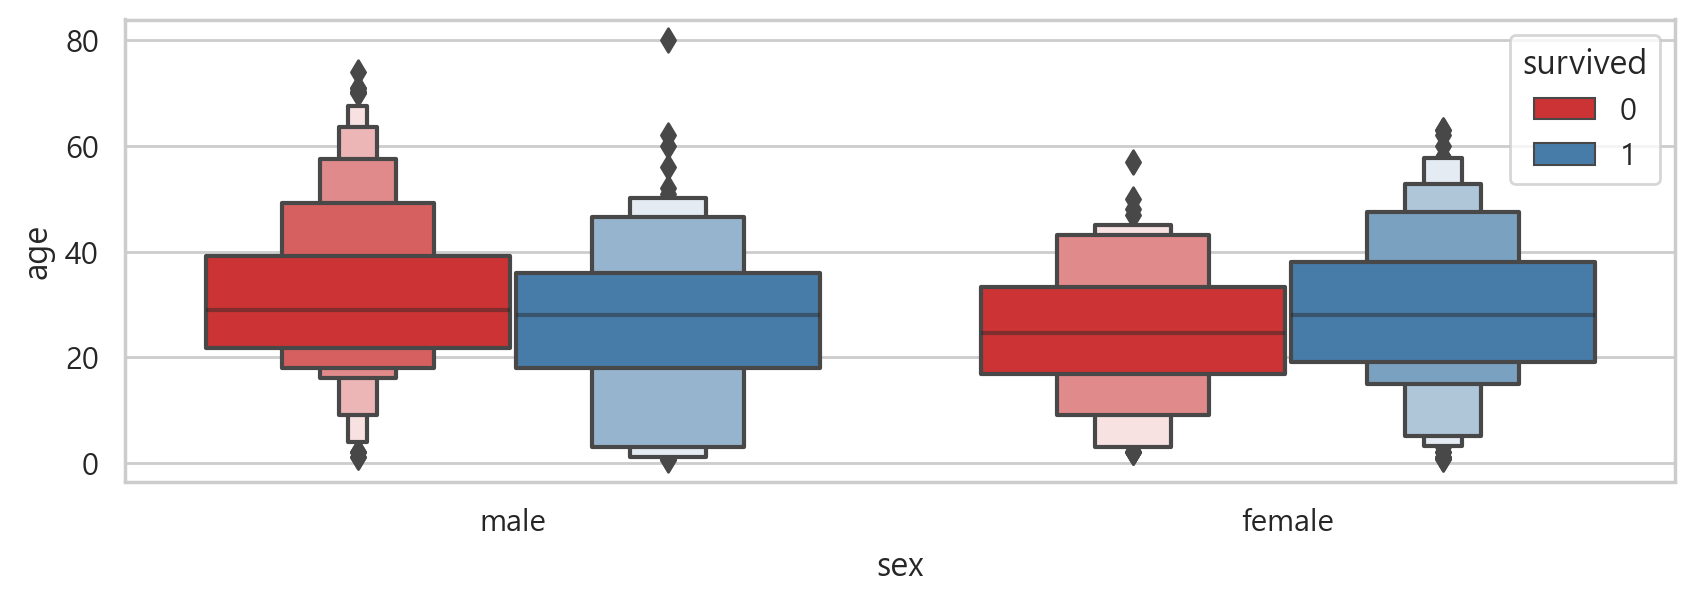

In [177]:
# boxenplot - 박스플롯의 기능에 분포를 추가 표시
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

### 3) 쌍관계 그래프 : 모든 수치데이터 대한 관계 그래프
- pariplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

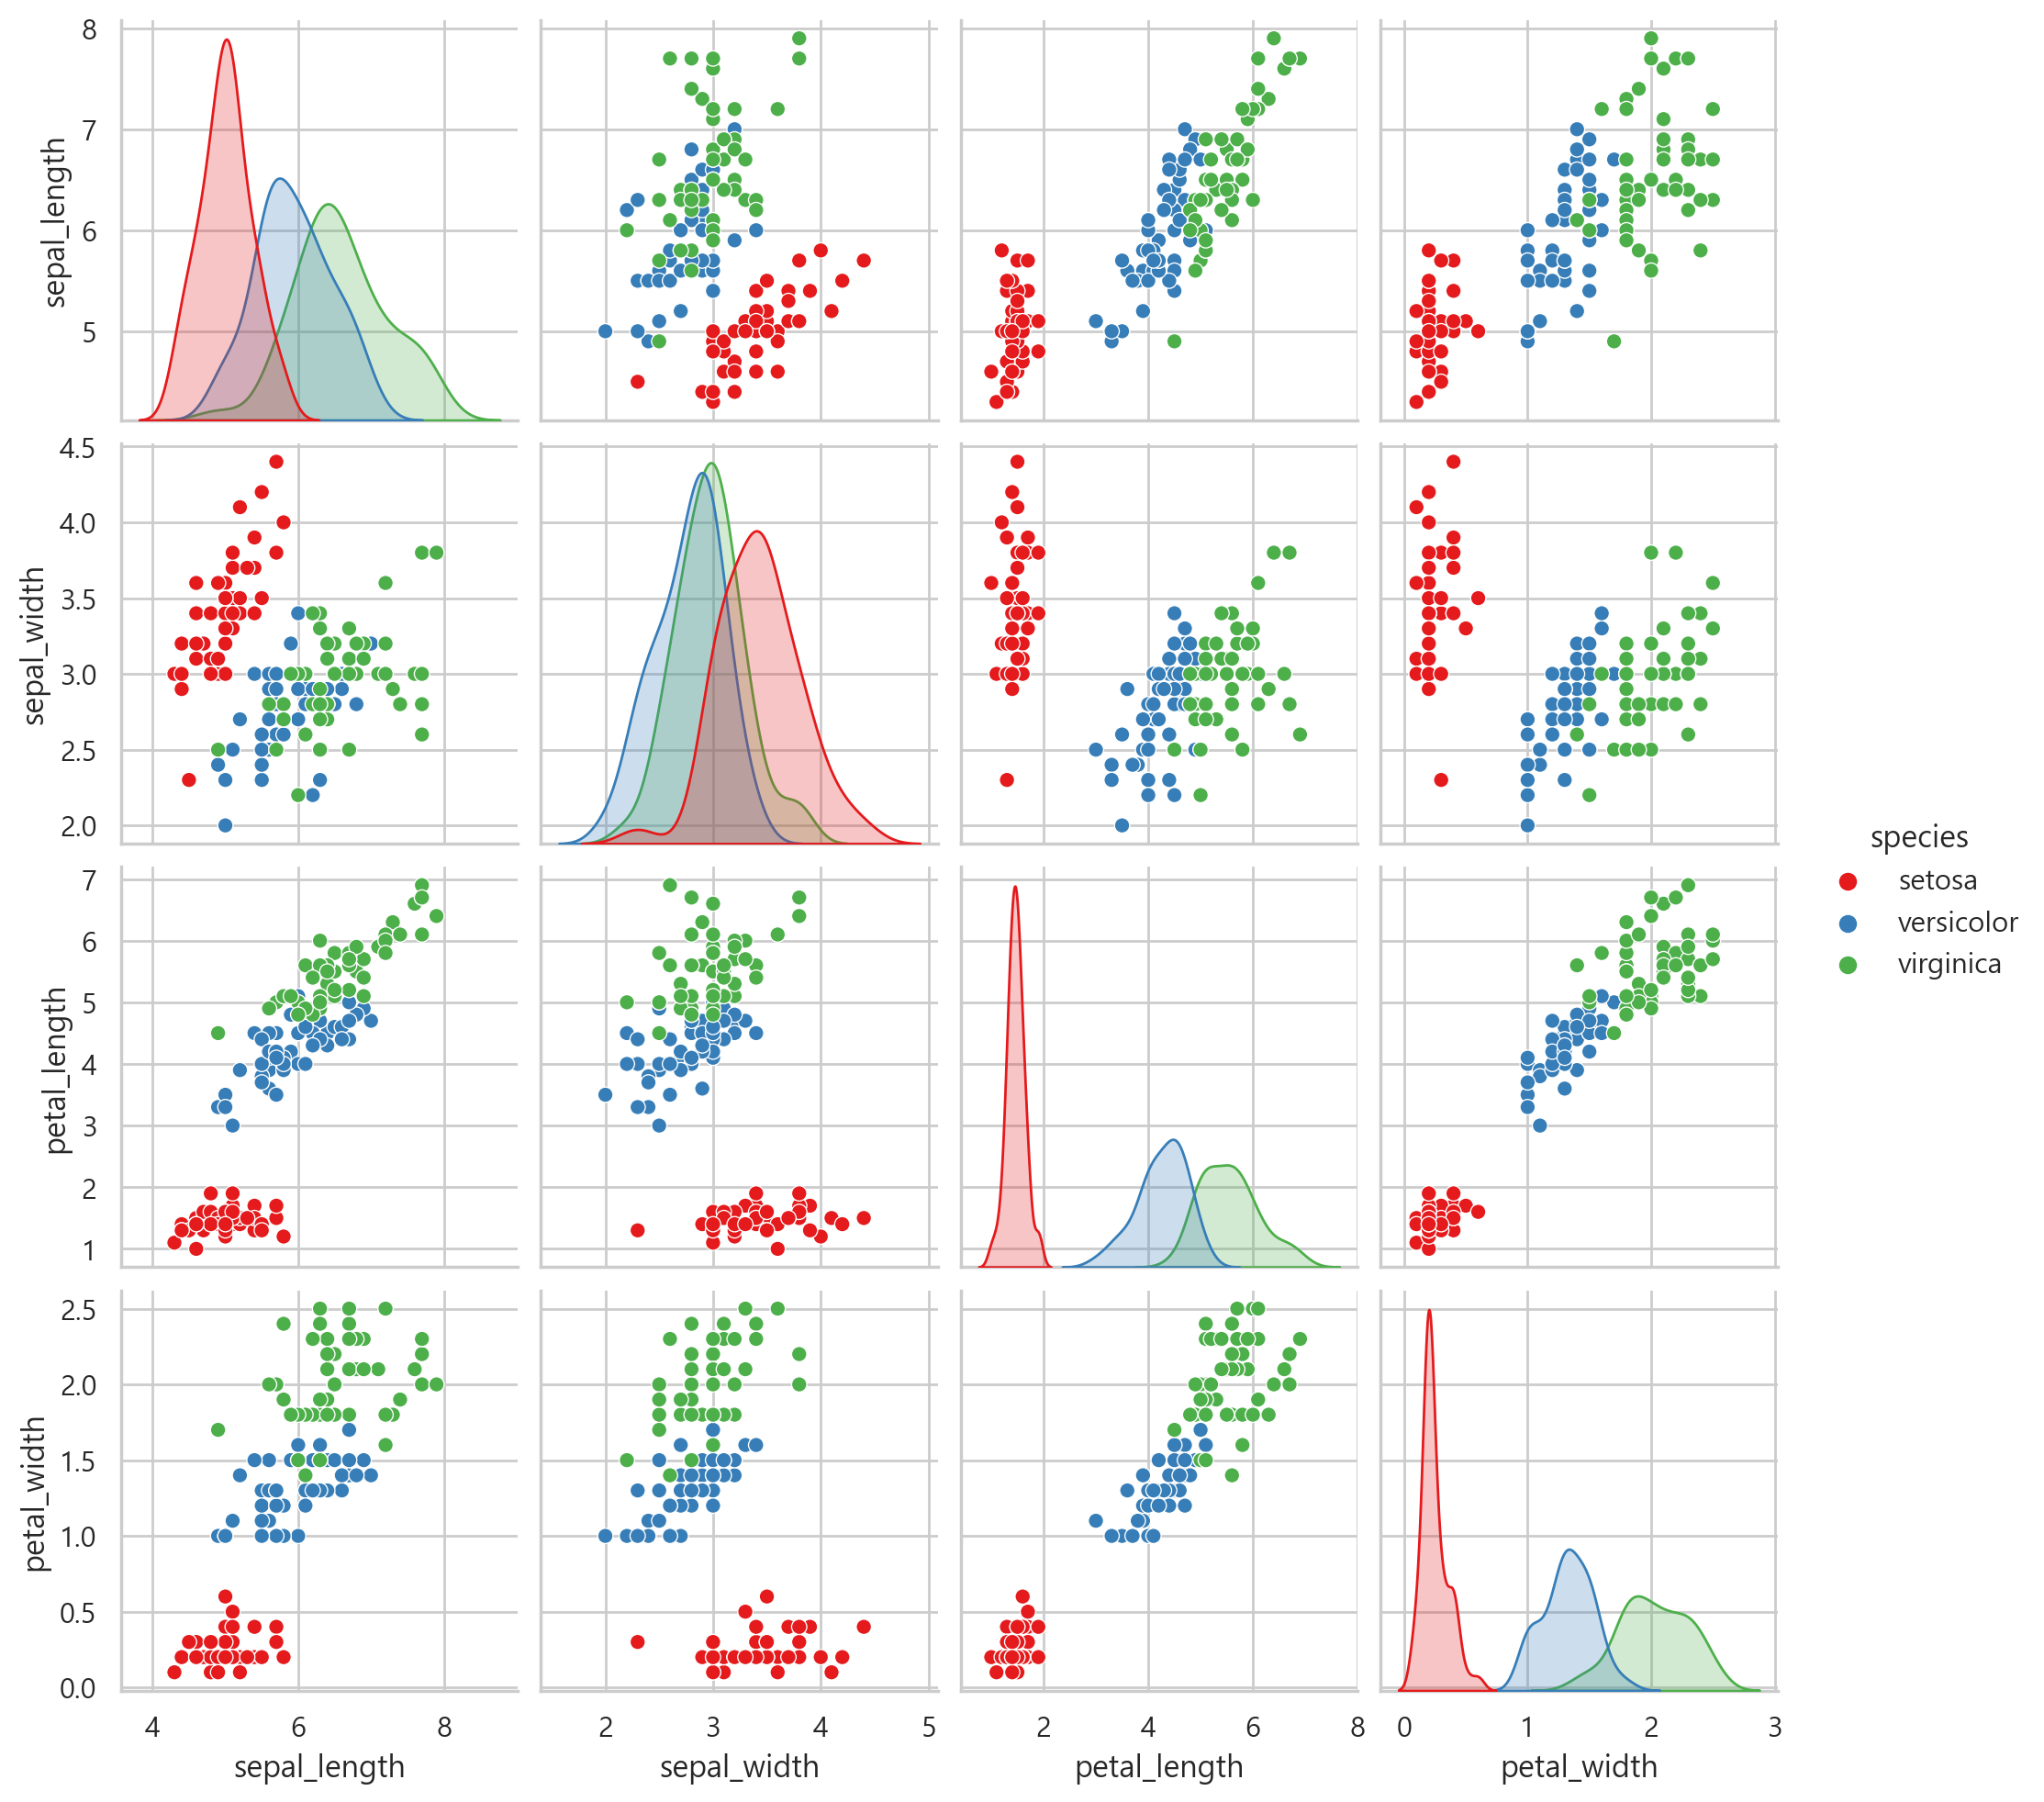

In [179]:
sns.pairplot(data=iris, hue='species')
# 같은 변수(ex. sepal_length-sepal_length)끼리는 히스토그램
# 다른 변수끼리는 scatter

### 4) 밀도 그래프
- histplot 
- displot

<Axes: ylabel='Count'>

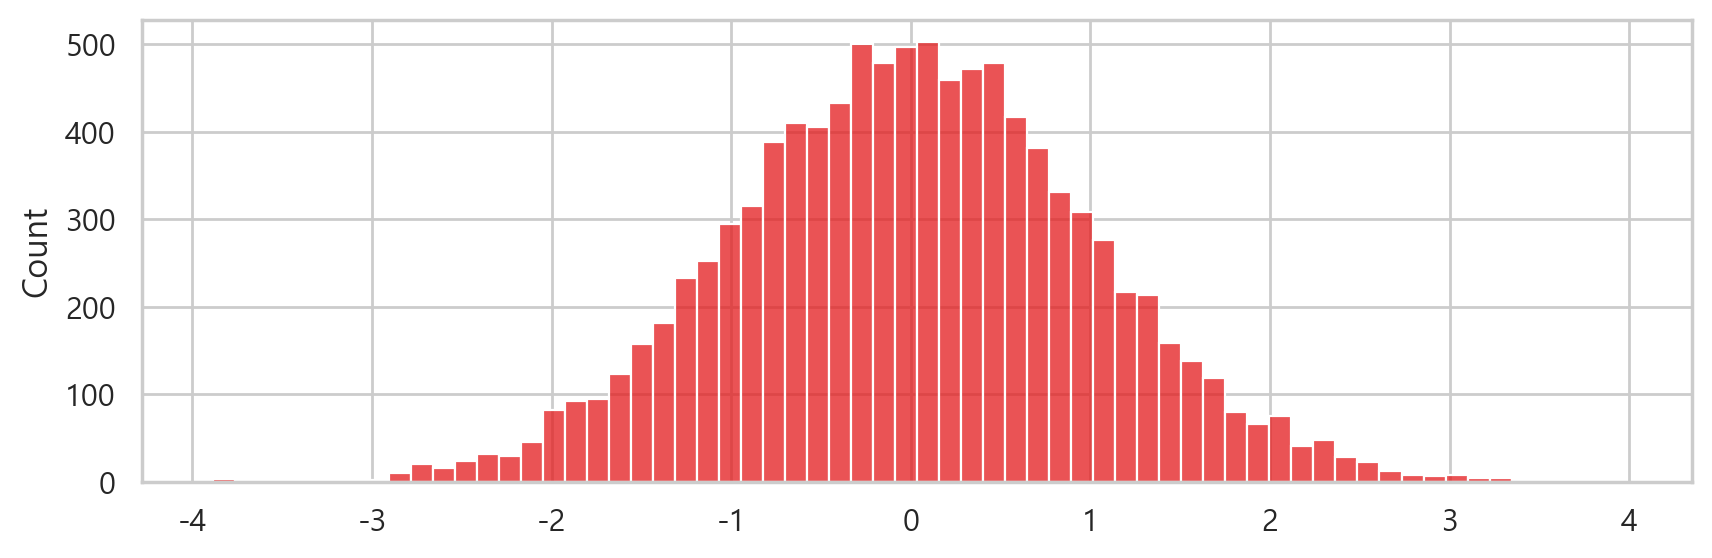

In [188]:
x = np.random.randn(10000) # 평균0, 표준편차1인 정규분포로 10000개 1차원 배열
sns.histplot(data=x, bins='auto')

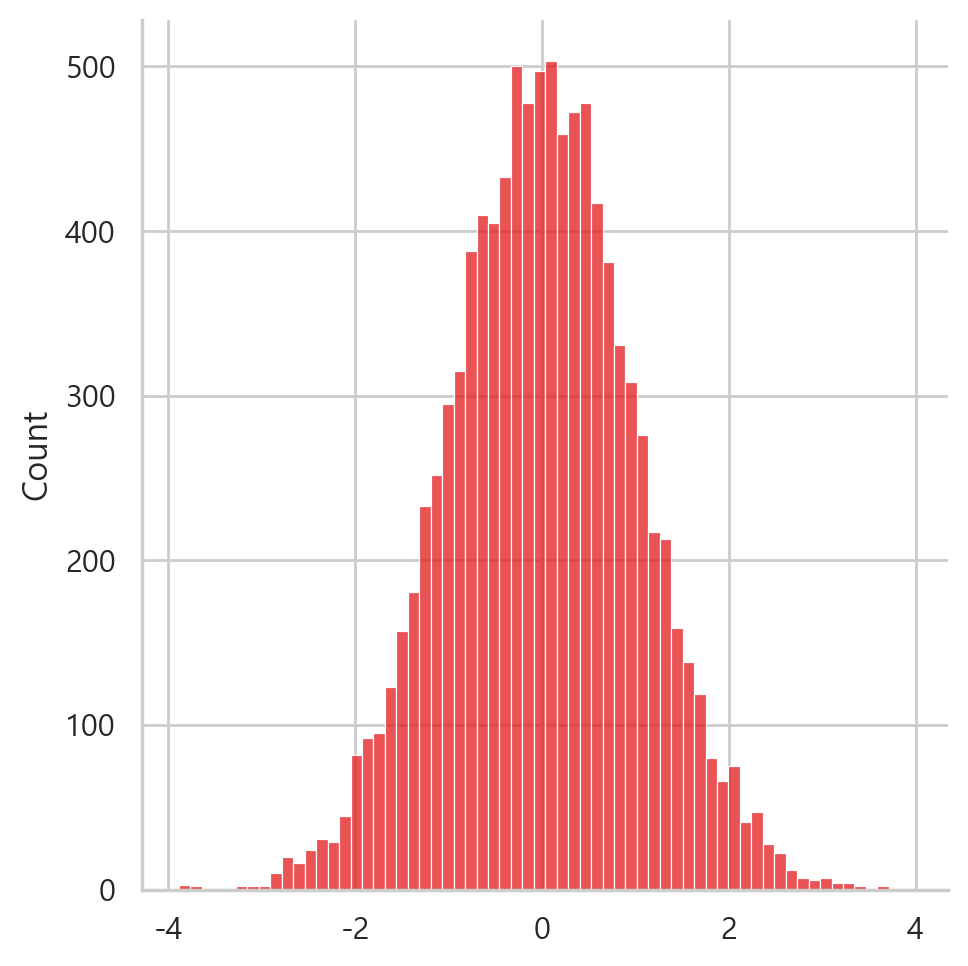

In [189]:
sns.displot(x)

### 5) 회귀 그래프 : regplot => lmplot(서브플롯)

In [191]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


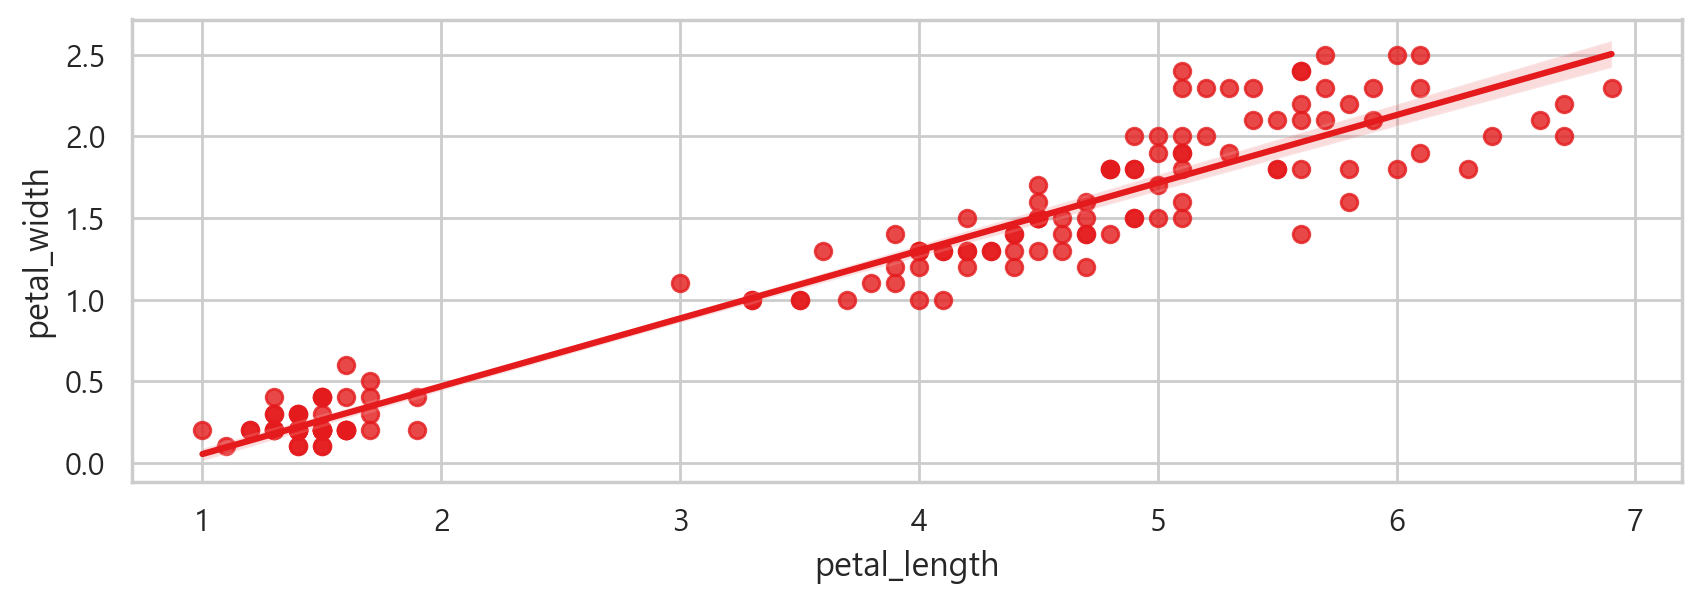

In [194]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width', 
#            hue='species',   # 에러 발생
           )
plt.show()

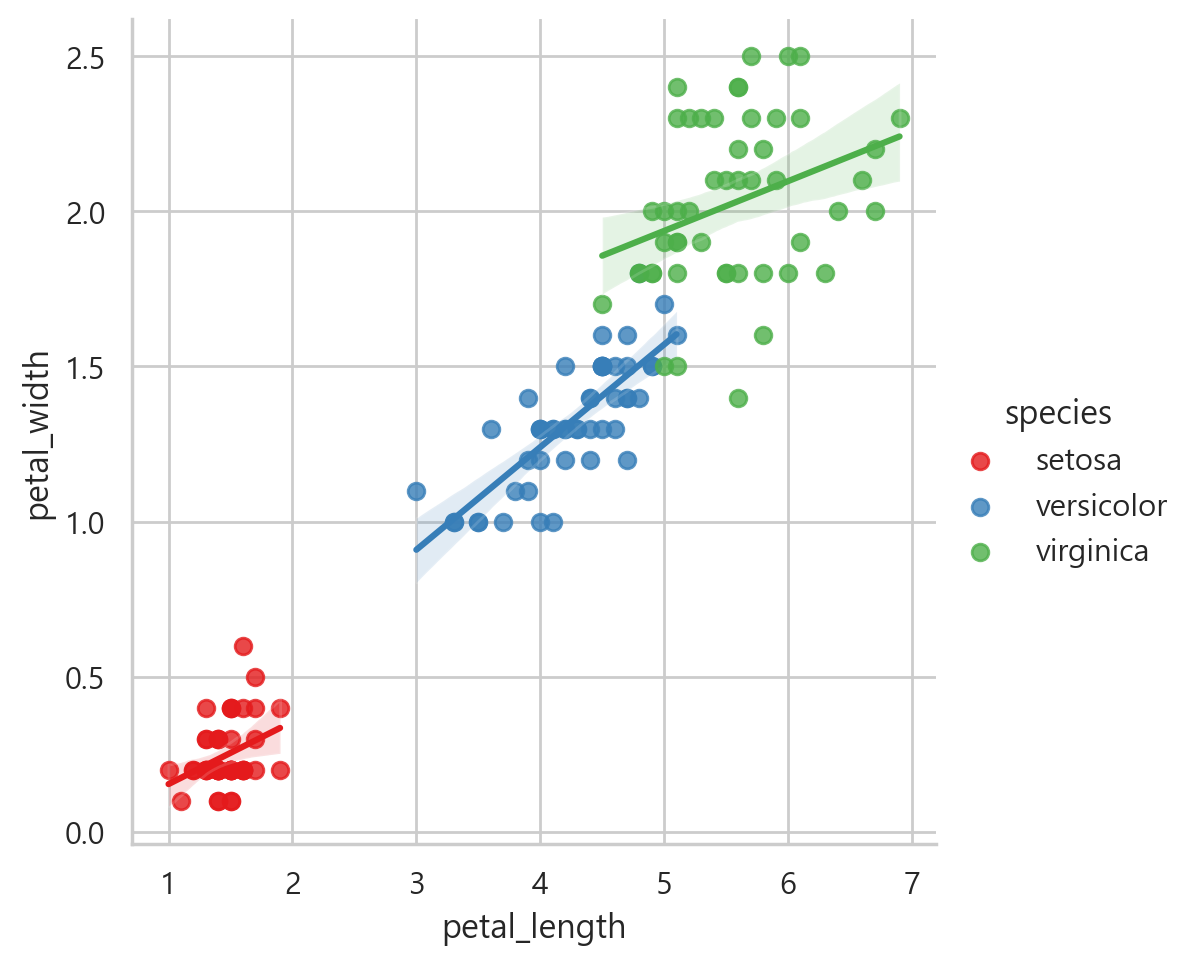

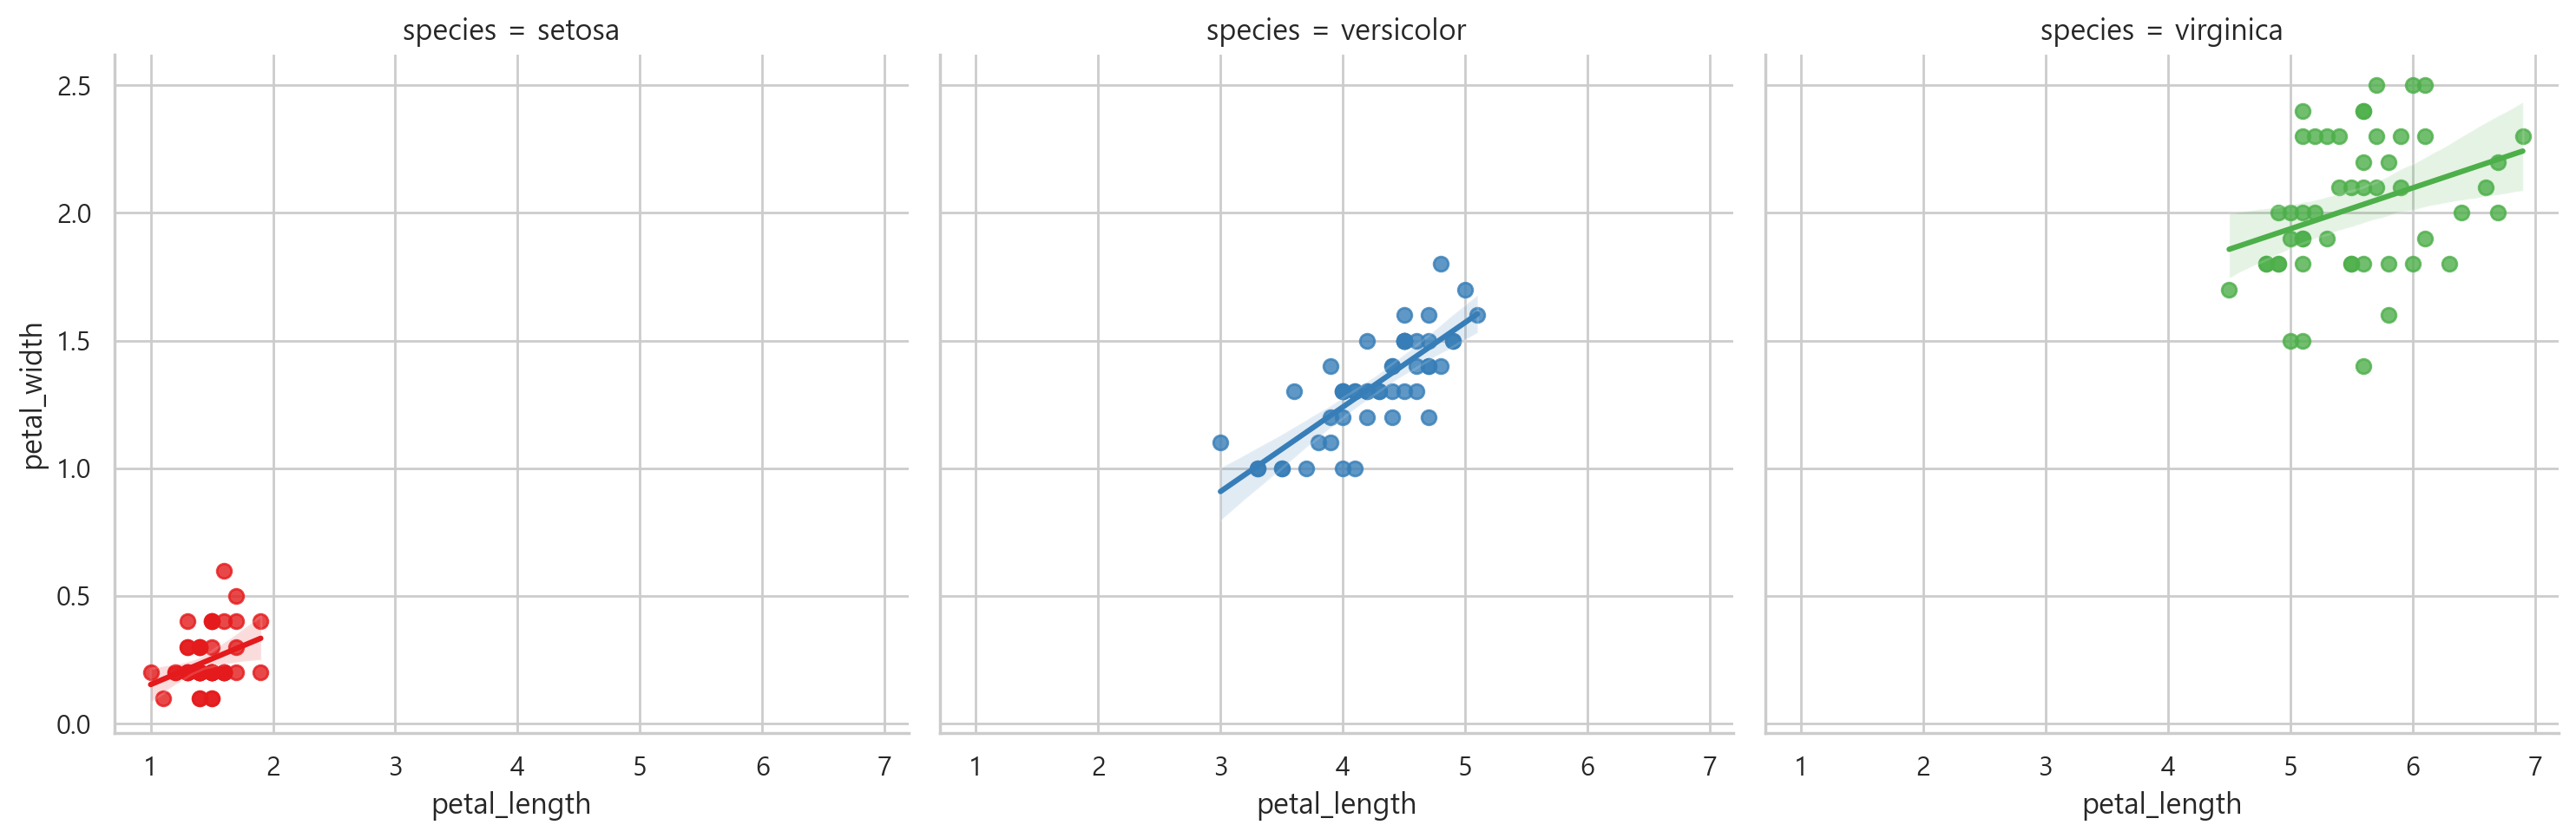

In [200]:
# 종별 회귀 그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
          hue='species',
#          col='species'  # 생략하면 1개의 그래프로 합쳐 그려서 종별 회귀 그래프
          )
sns.lmplot(data=iris, x='petal_length', y='petal_width',
          hue='species',
          col='species'  
          )
plt.show()

## 2.4 다중 그래프를 위한 FacetGrid

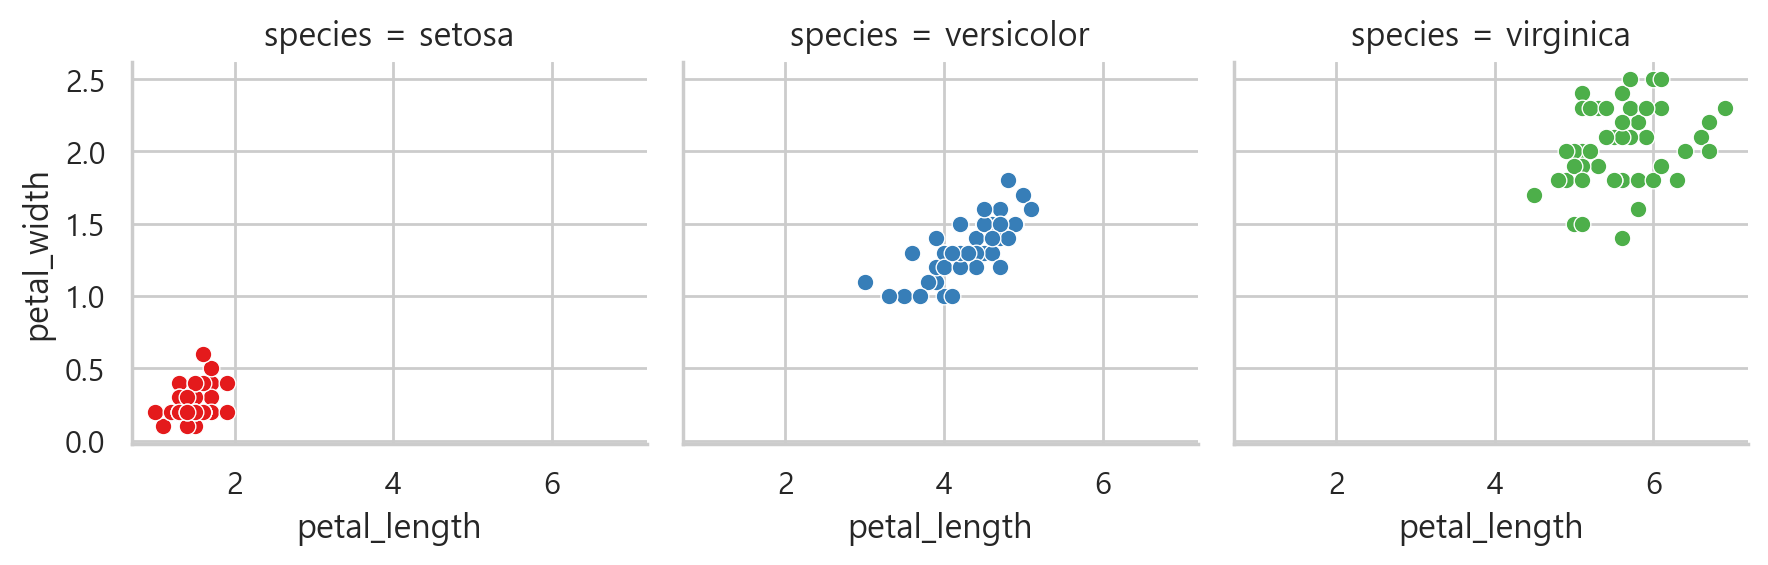

In [201]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

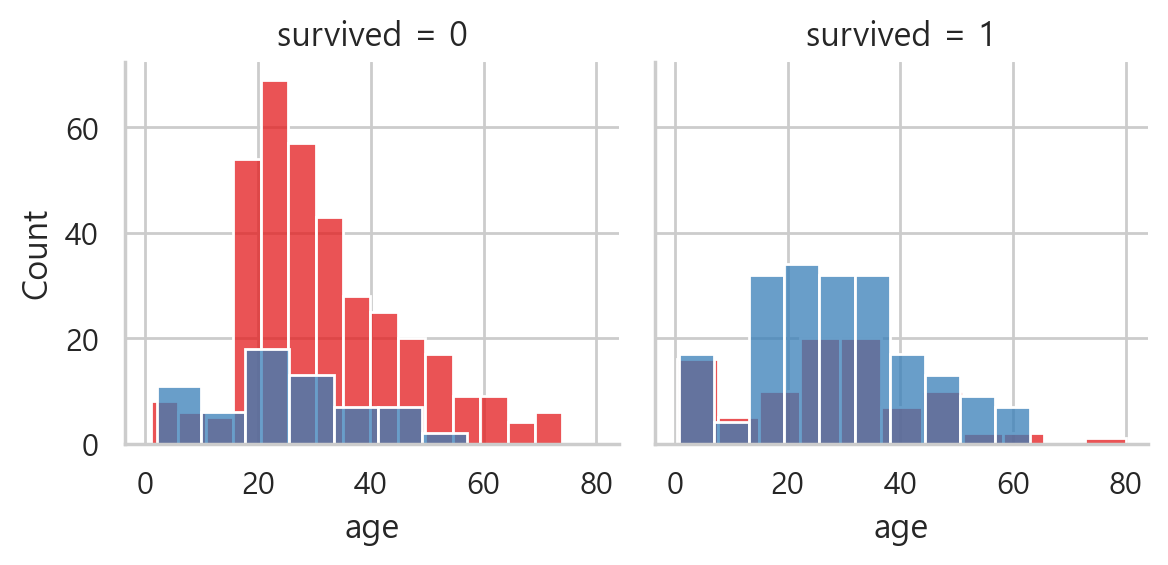

In [202]:
g = sns.FacetGrid(titanic, col='survived', hue='sex')  # 겹쳐서 잘 안보인다.
g.map(sns.histplot, 'age')
plt.show()

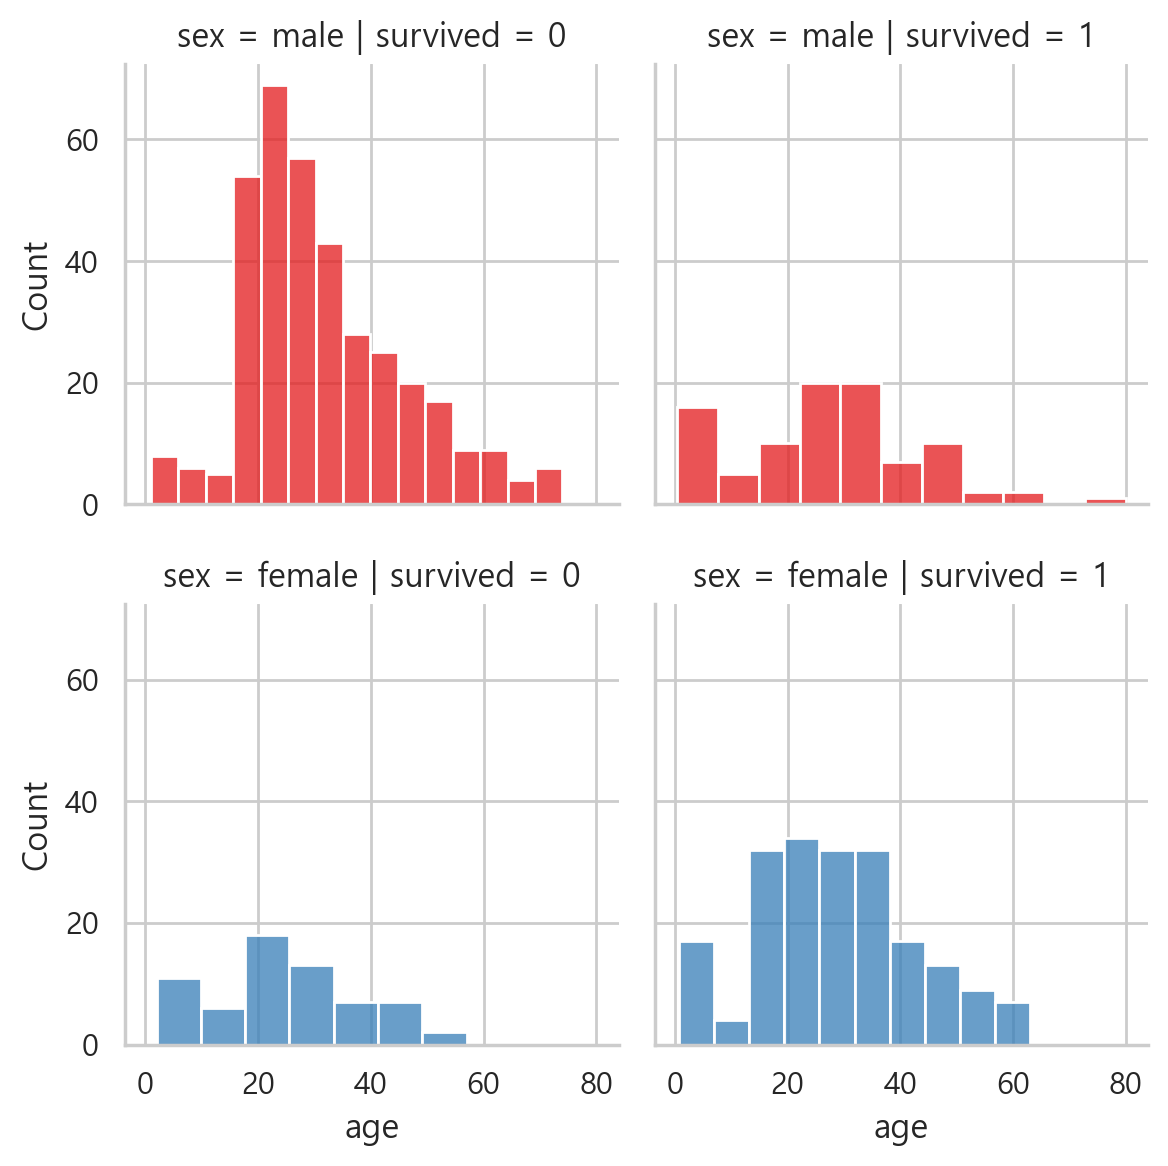

In [203]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex') # row='sex' 성별을 기준으로 행을 나눈다
g.map(sns.histplot, 'age')
plt.show()